# This notebook contains the Stacks parameter tests, final parameters used and analyses to identify sex linked markers for the RADseq dataset of <i> Rana dalmatina </i> 
## Sample set:
19 Females, 20 Males

However these samples come from many different sample sites, and are not the same population (see R plot below)


All analyses including the outputs below are in "/archive/dee/perrin/djeffrie/turnover_project/RAD_seq_datasets/Completed/ . . . "

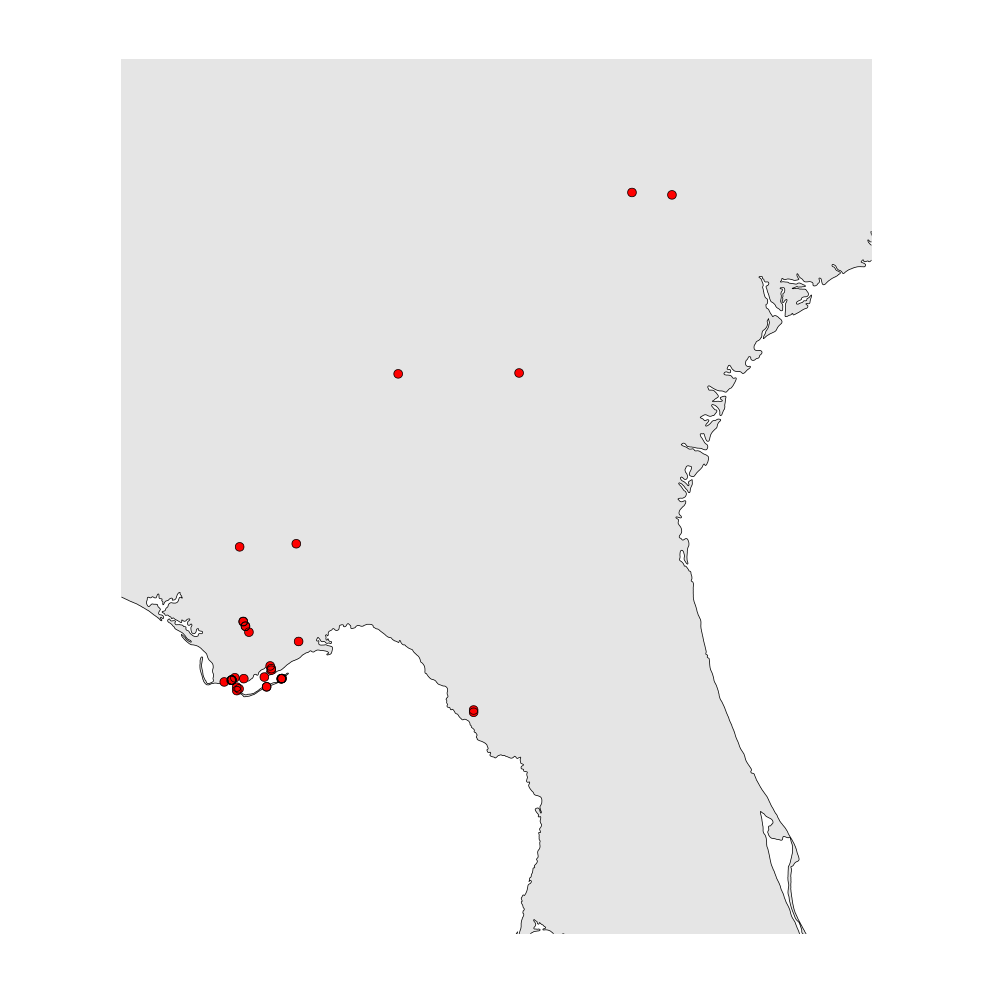

In [65]:
%%R -w 35 -h 35 -u cm

library(maps)
library(mapdata)
library(mapplots)

map("worldHires", xlim=c(-86, -80), ylim=c(28,34), col="gray90", fill=TRUE)##plots the area of the map that I am interested in (just Europe, leave out x/ylim arguments for whole world view)

coords <- read.delim("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sample_info/Sample_coords.txt", header = F)

points(coords$V3, coords$V2, pch=19, col="red", cex=1.5)
points(coords$V3, coords$V2, col="black", cex=1.6)

In light of this sample distribution, once the SNP data has been generated, I will then plot a PCA of all the data, to isolate the separate lineages in the samples if they exist. I will then look for SL markers within these lineages. 

Contents:

1. Ustacks parameter tests & final parameters used
2. Cstacks parameter tests & final parameters used
3. Populations parameter tests & final parameters used
4. Identification of sex-linked markers

    
**Scripts for Incremental can be found in the Incremental module, 

**custom scripts for analyses of sex-linked markers can be found in the package "some_sexy_tools".

In [17]:
%matplotlib inline
import os
import wget ## used "sudo pip install wget" in command line to get package.
import Incremental_U as IncU ## Get this sorted
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [18]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##Stacks parameter tests --------------------------------------------------------
###Ustacks
Files for the analyses below were transfered from the demultiplexed fastq.gz files on the archive.

In [3]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Ustacks/"

In [4]:
## INPUT INCREMENTAL PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                                             ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                                                 ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                                        ## Int. eg 7
parent_dir = Incrememntal_test_directory    ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                            ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = True

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'Lsphe_01239.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                         'MS': { 2: { }, 3: { }, 4: { }},
                         'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Lsphe_01240.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                         'MS': { 2: { }, 3: { }, 4: { }},
                         'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Lsphe_01248.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                         'MS': { 2: { }, 3: { }, 4: { }},
                         'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Lsphe_01369.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                         'MS': { 2: { }, 3: { }, 4: { }},
                         'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'Lsphe_01386.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                         'MS': { 2: { }, 3

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


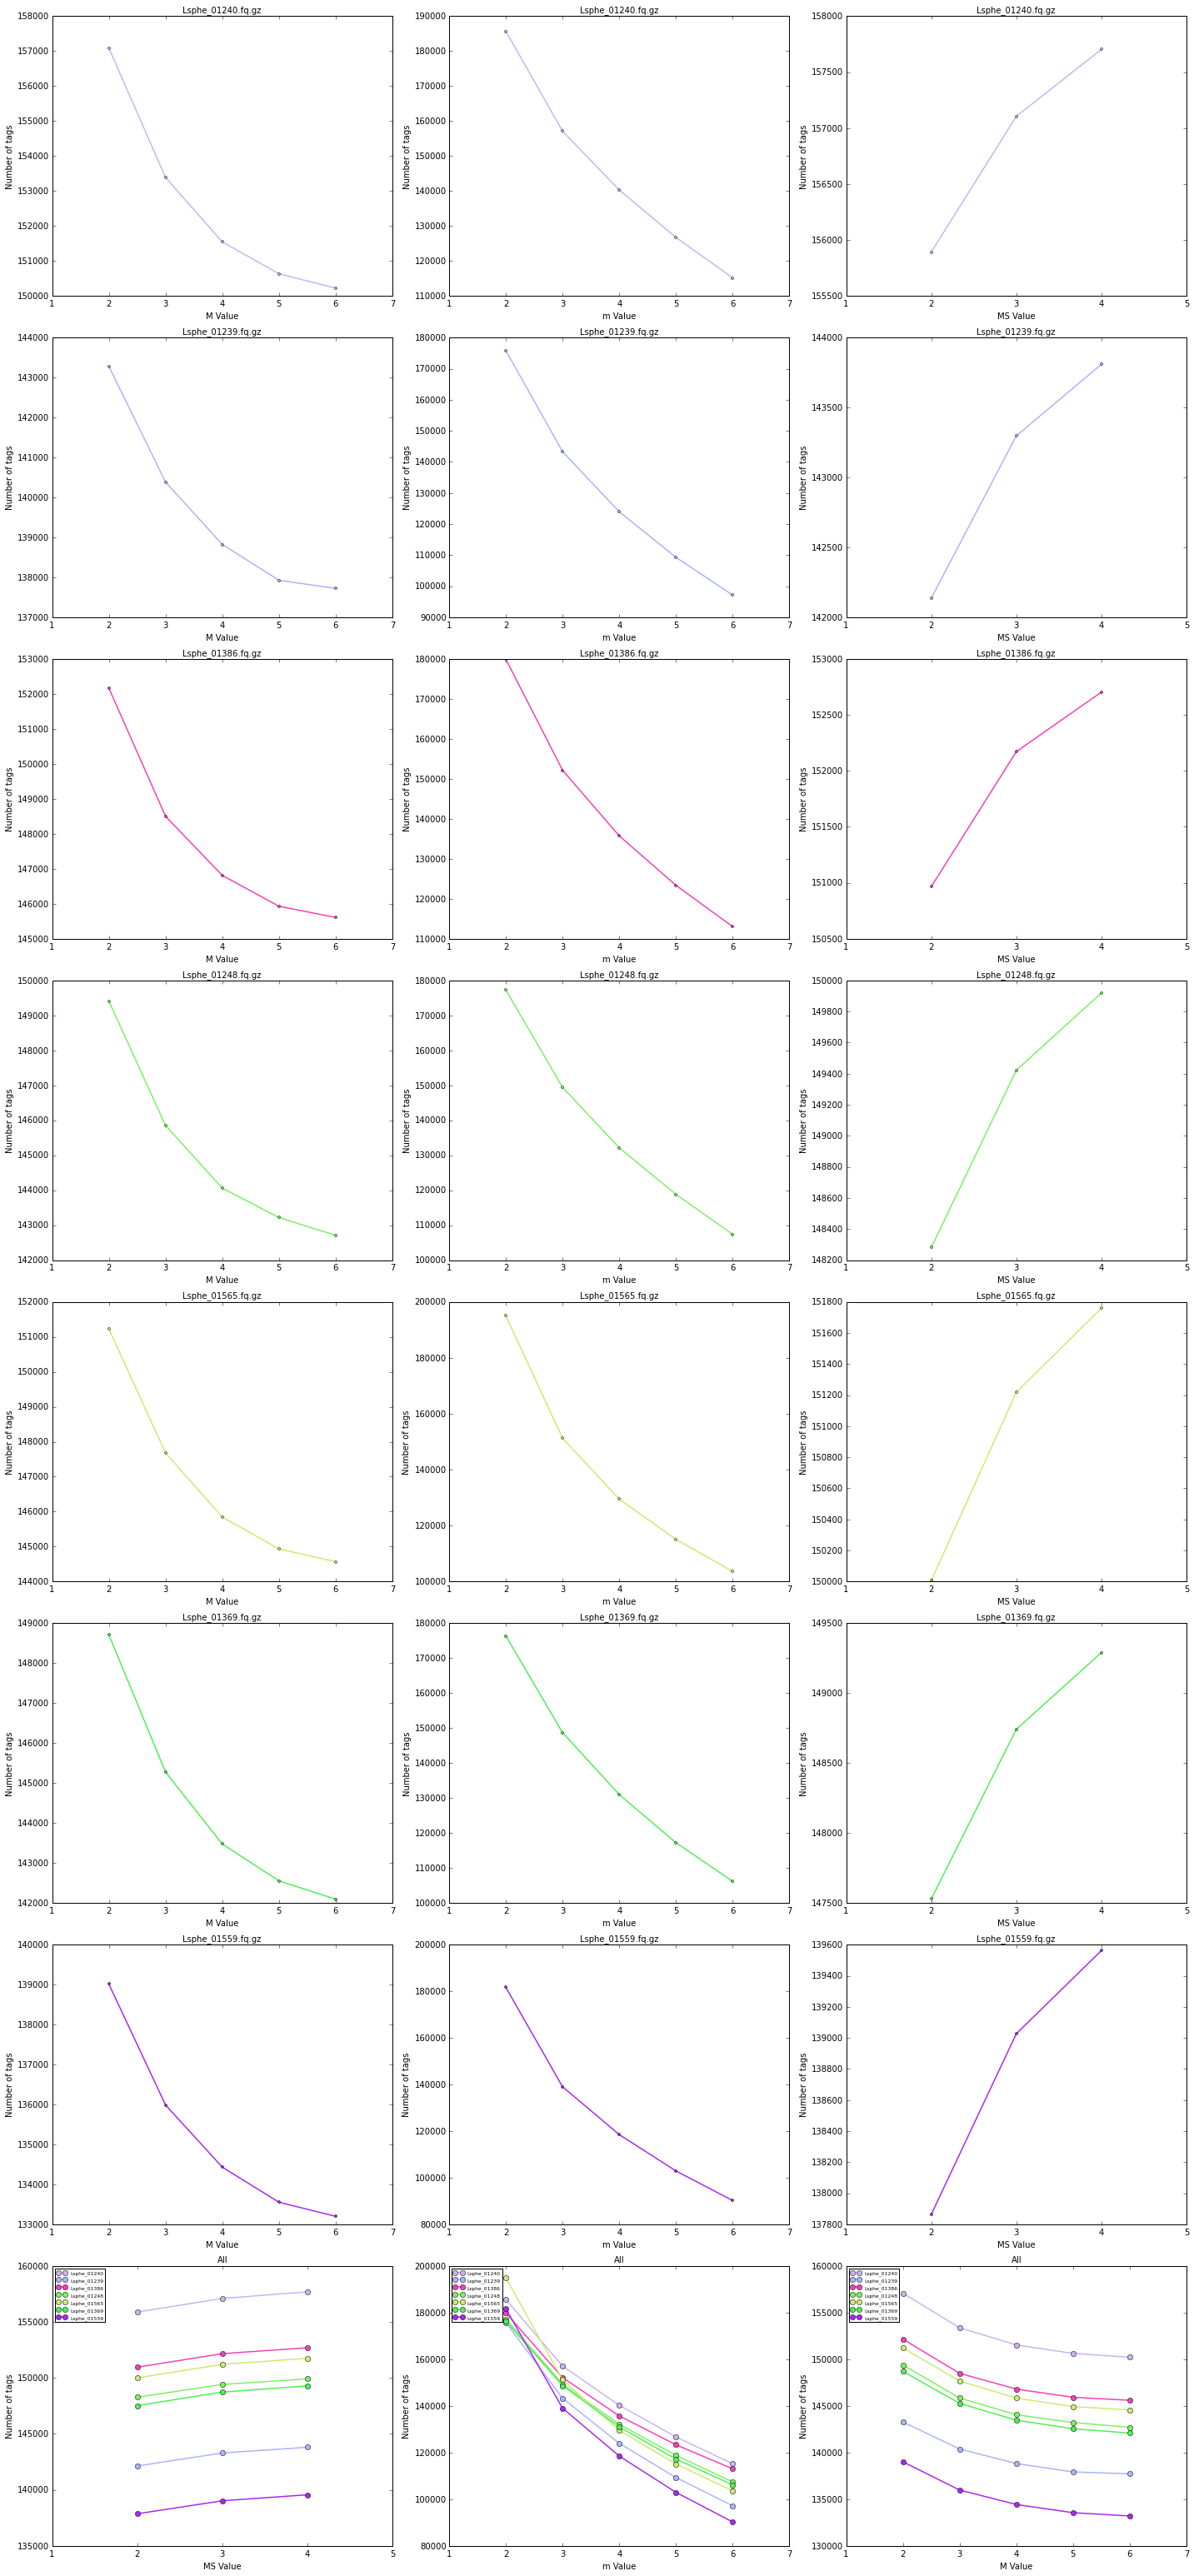

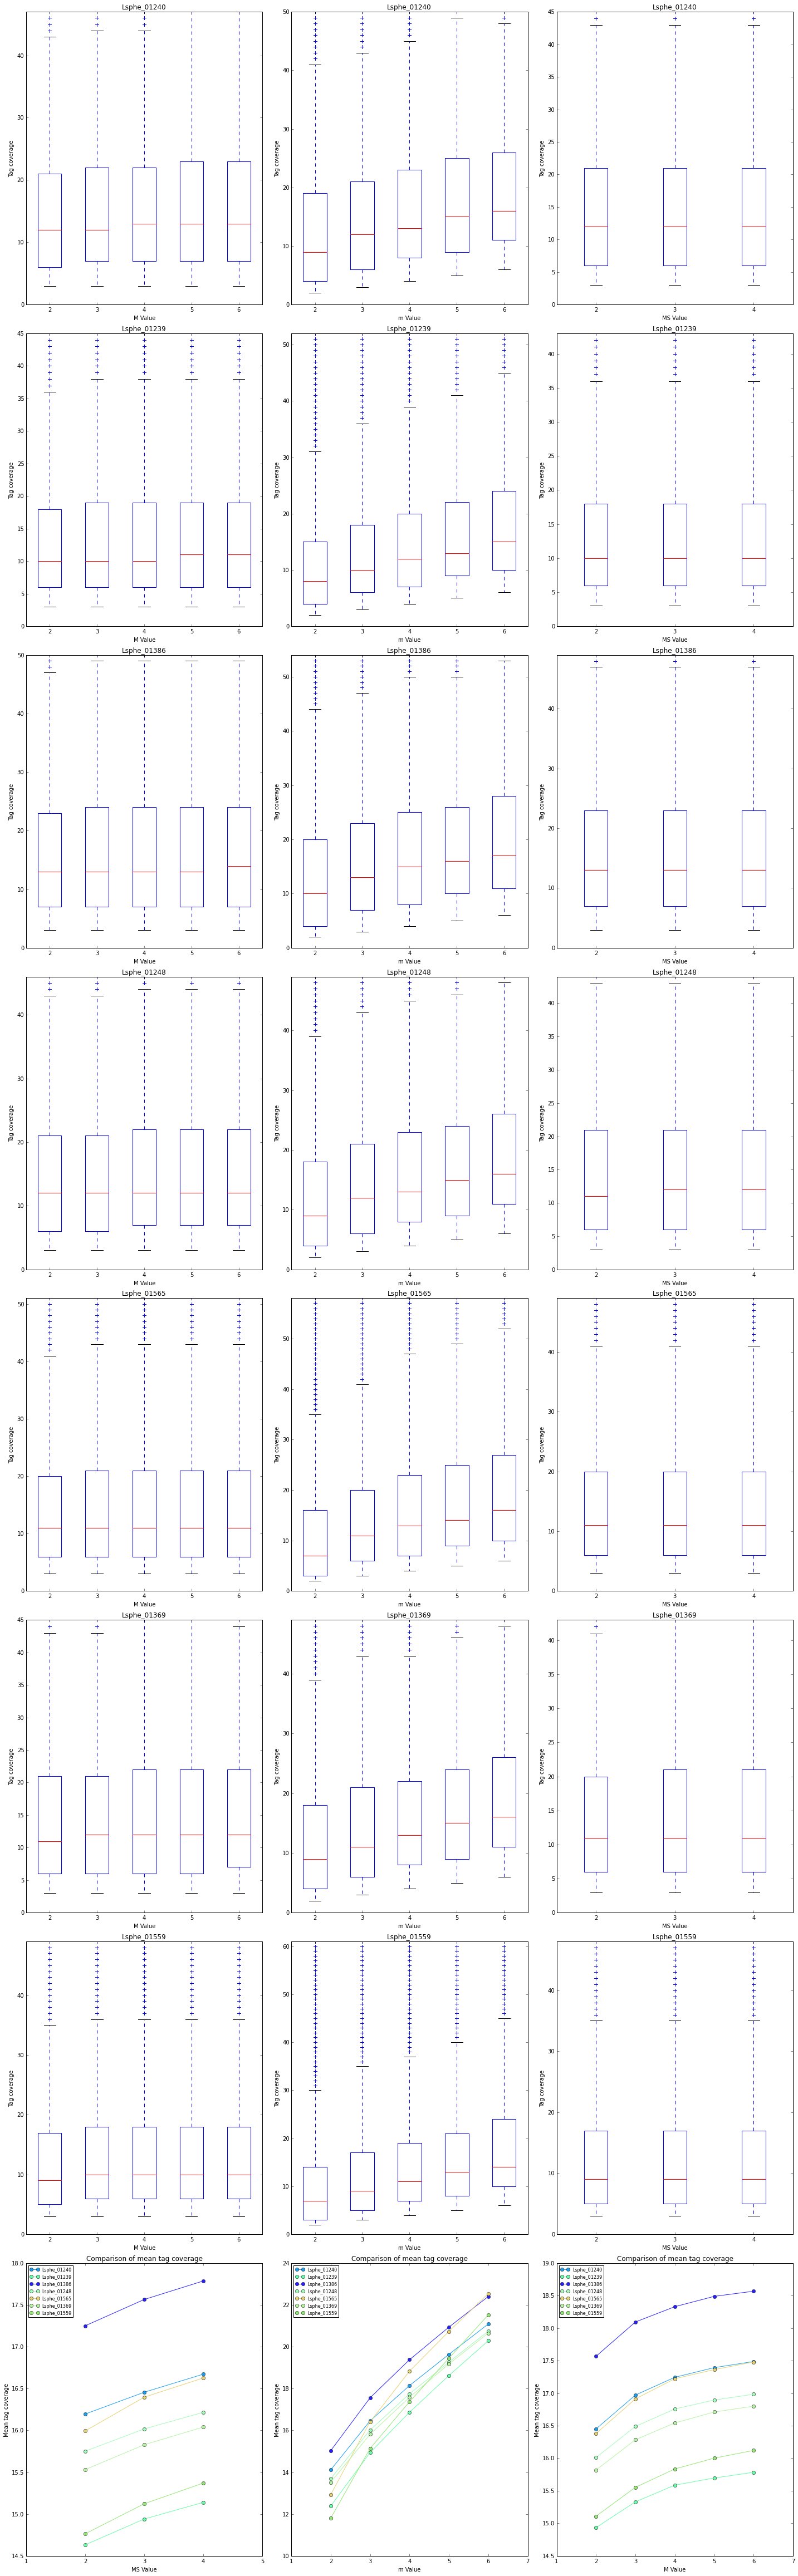

In [5]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

This dataset looks ok . . .  Coverage is a bit low but not so bad

#### Final Ustacks commands ----------------------------------------------

Used M = 2, m = 3 and other defaults in final Ustacks

###Cstacks 

In [6]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

Lsphe_01239, ID = 2
Lsphe_01240, ID = 1
Lsphe_01248, ID = 4
Lsphe_01369, ID = 6
Lsphe_01386, ID = 3
Lsphe_01559, ID = 7
Lsphe_01565, ID = 5


In [11]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks"
Parameter_dict["sample_ids"] = [6,3,7]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [6, 3, 7],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01559 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01386 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01369 7 -o /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01559 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01386 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01369 7 -o /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01559 -s /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Cstacks/Lsphe_01386 -s /home/djeffrie/Data/RADseq/Lsphenosephal

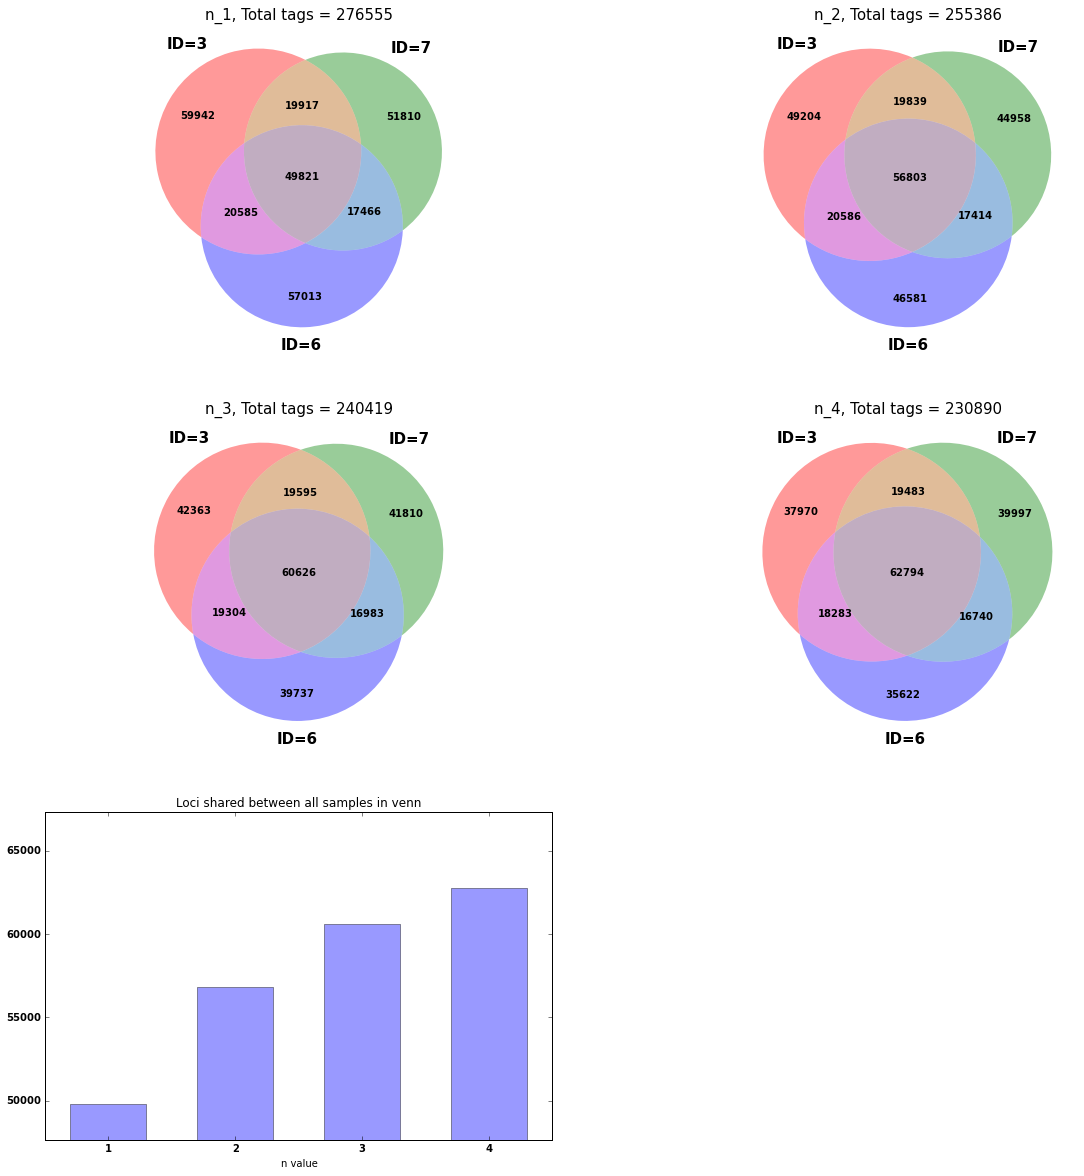

In [12]:
IncC.Incremental_C(Parameter_dict)  ## The 4 venn plot is still a problem -

A large number of loci per sample, but not a "massive" amount shared between samples - seems to be quite a lot of heterozygosity here though, both within and between samples. Might be worth testing higher U and Cstacks params e.g. -M 4 -n 4.

####Final Cstacks command ---------------------------------------------------------------------

n = 2

All other parameters default

### Populations
         
         - First ran populations with relaxed filtering parameters (r = 0.5 and p = 1) to allow me to look at 
         the amount of missing data per individual. Then remove these samples before doing other parameter tests . . 
         (Plot not shown)

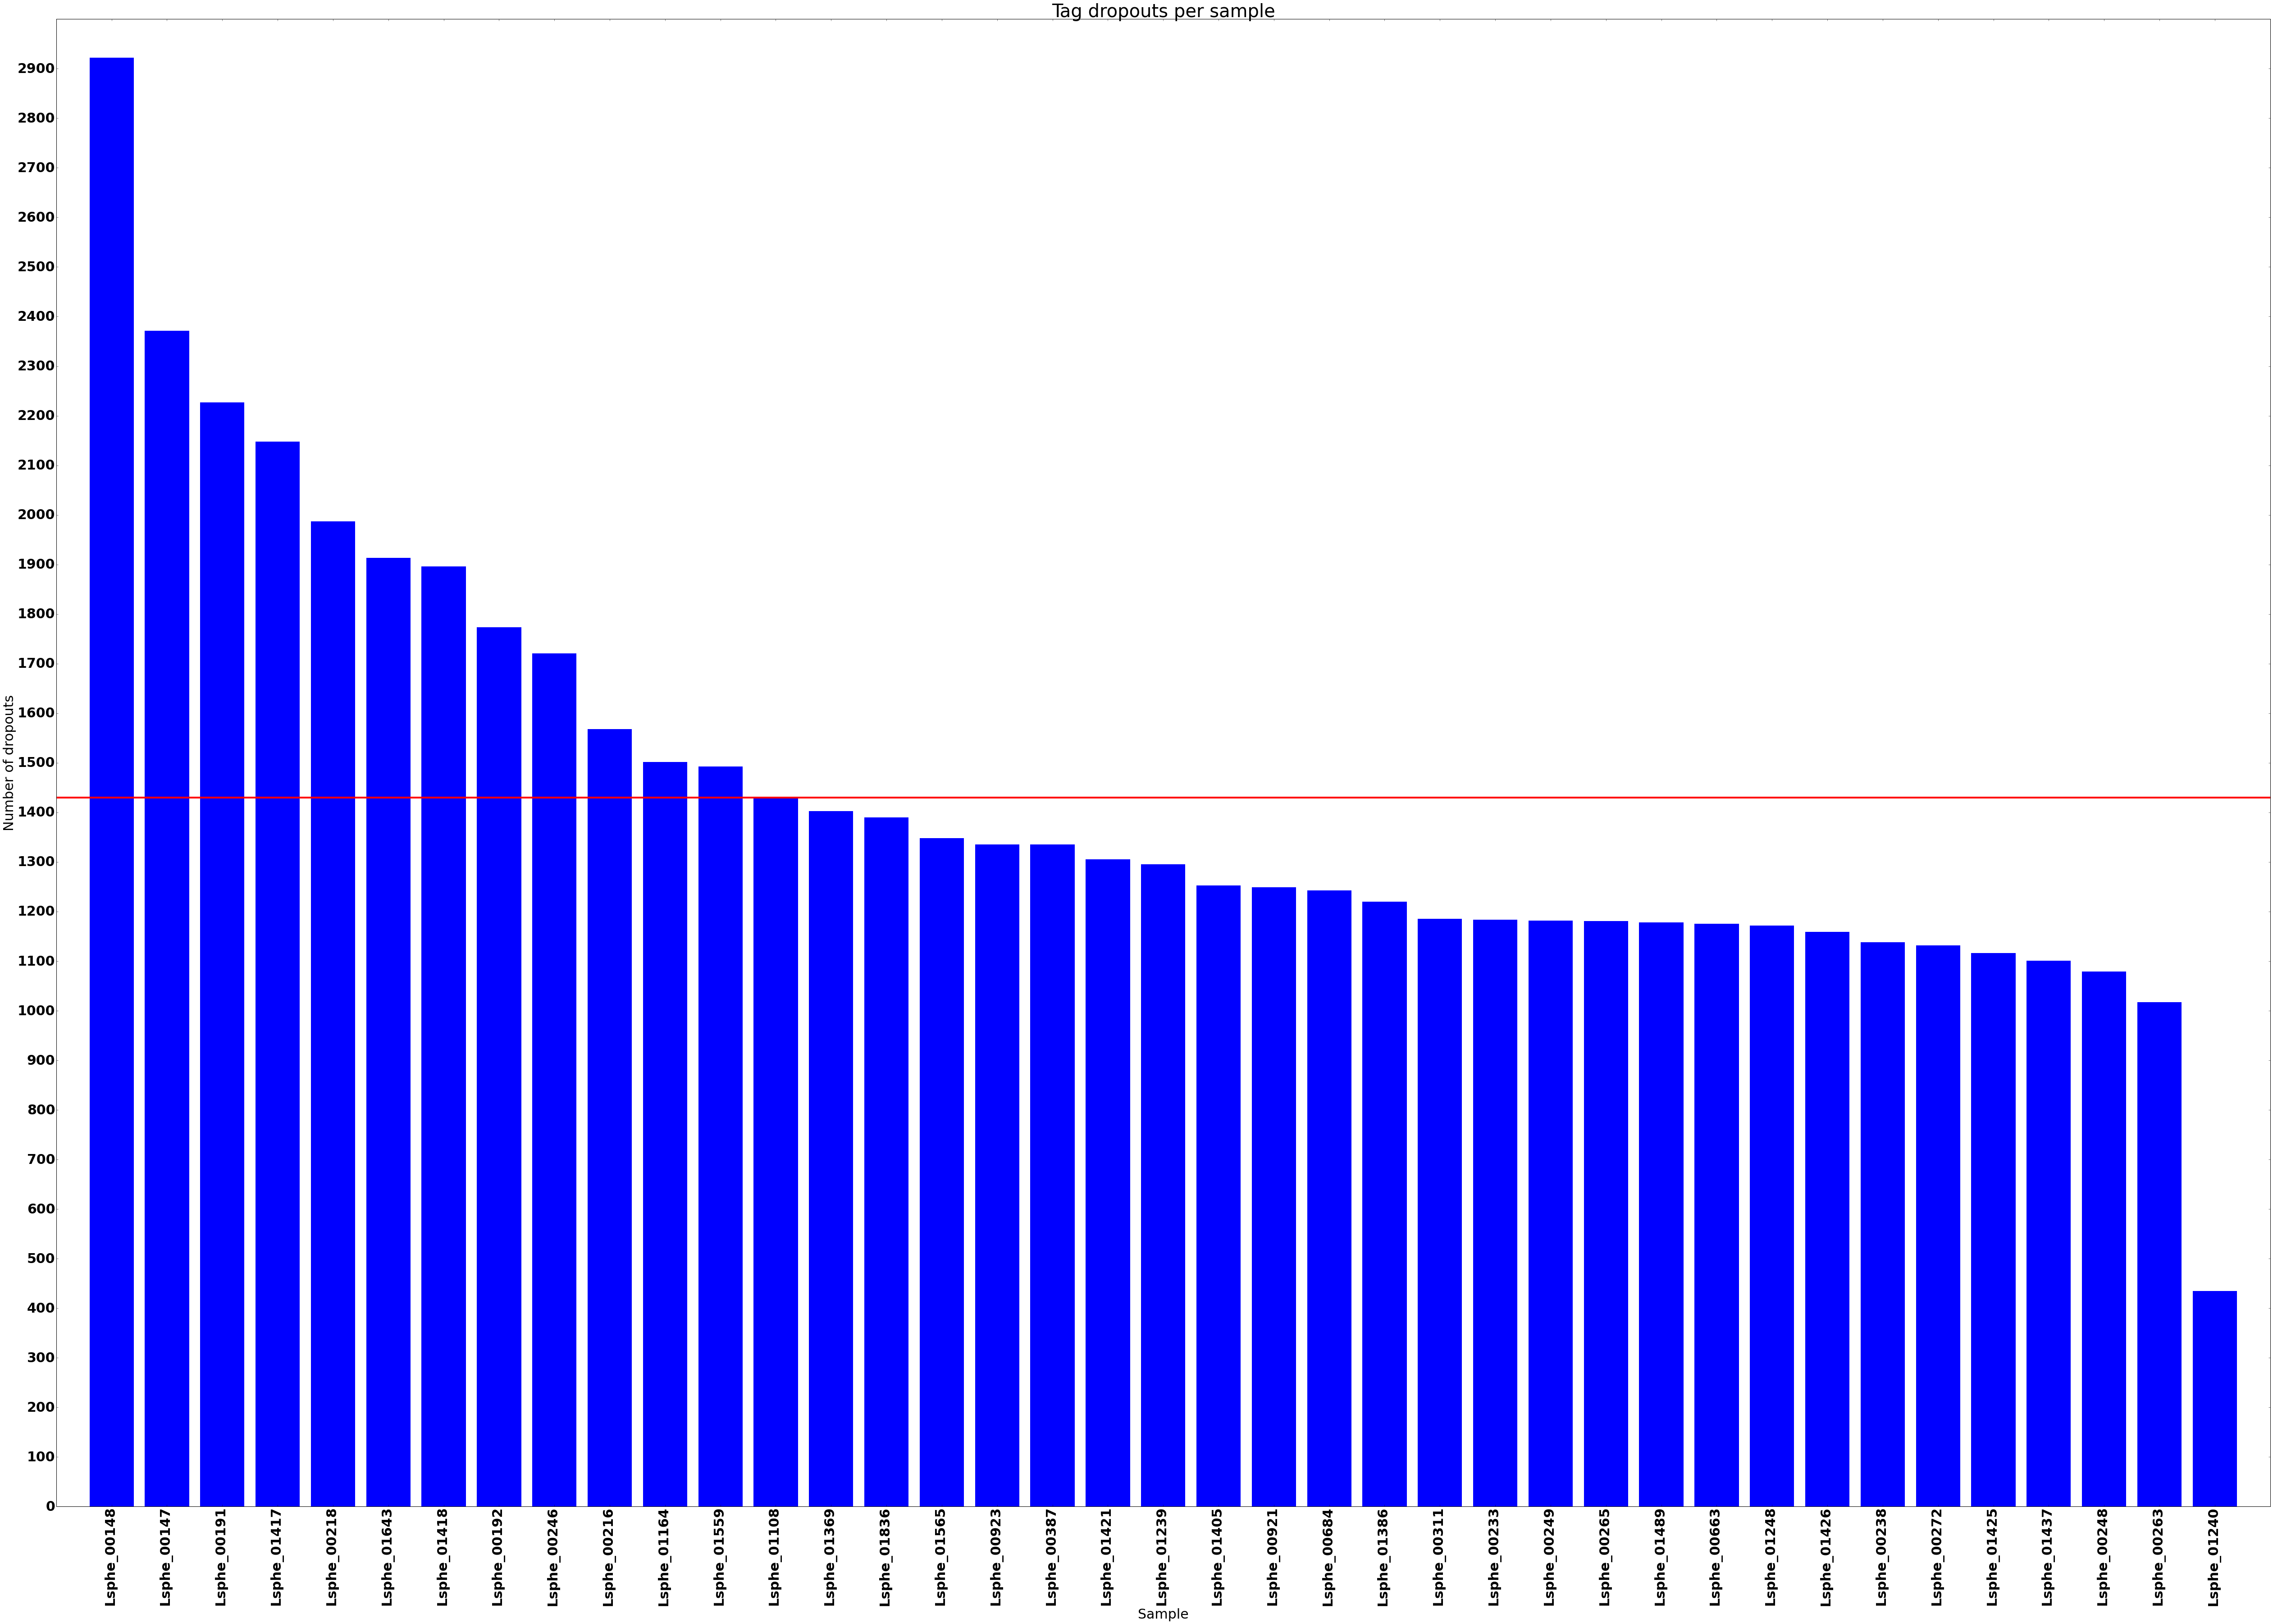

Outputs written to:
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//blacklist.txt


In [16]:
wd = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

####Removed the worst 8 samples (still leaves 32)

- Lsphe_00148
- Lsphe_00147
- Lsphe_00191
- Lsphe_01417
- Lsphe_00218
- Lsphe_01643
- Lsphe_01418
- Lsphe_00192
- Lsphe_00246


#### Final Populations sample set:

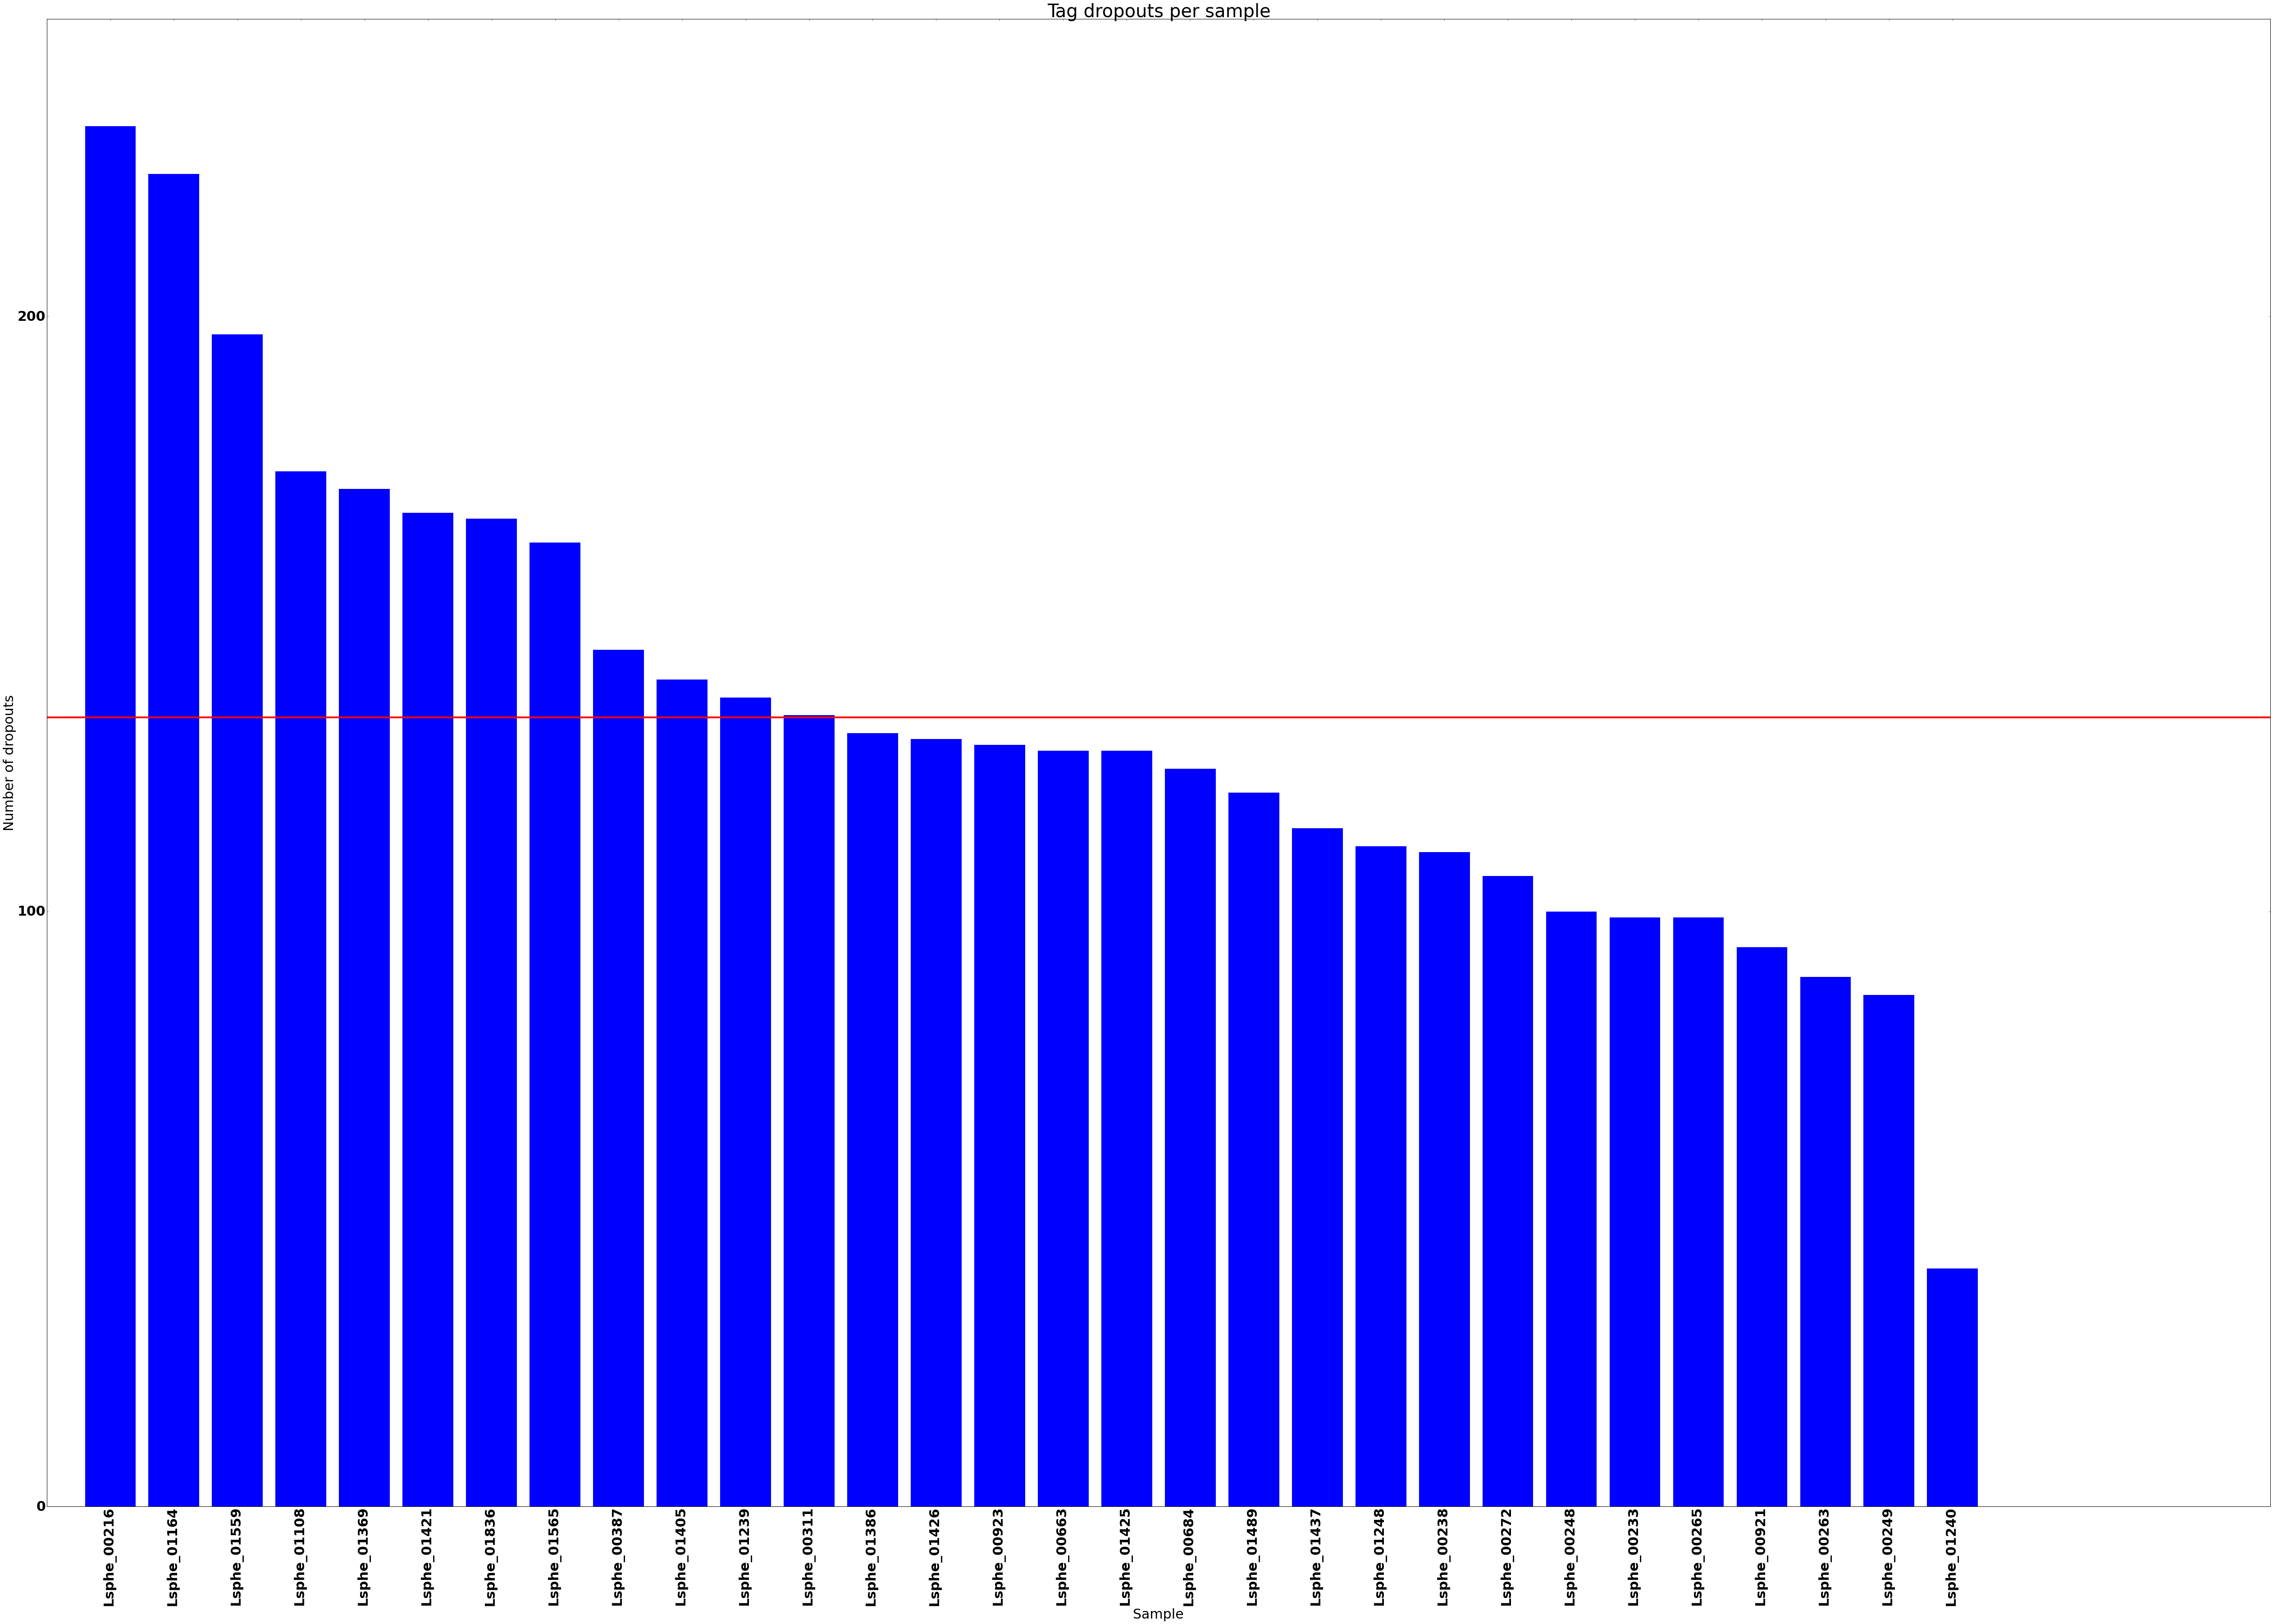

Outputs written to:
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering//blacklist.txt


In [23]:
wd = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/"
blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

## BIG VCF

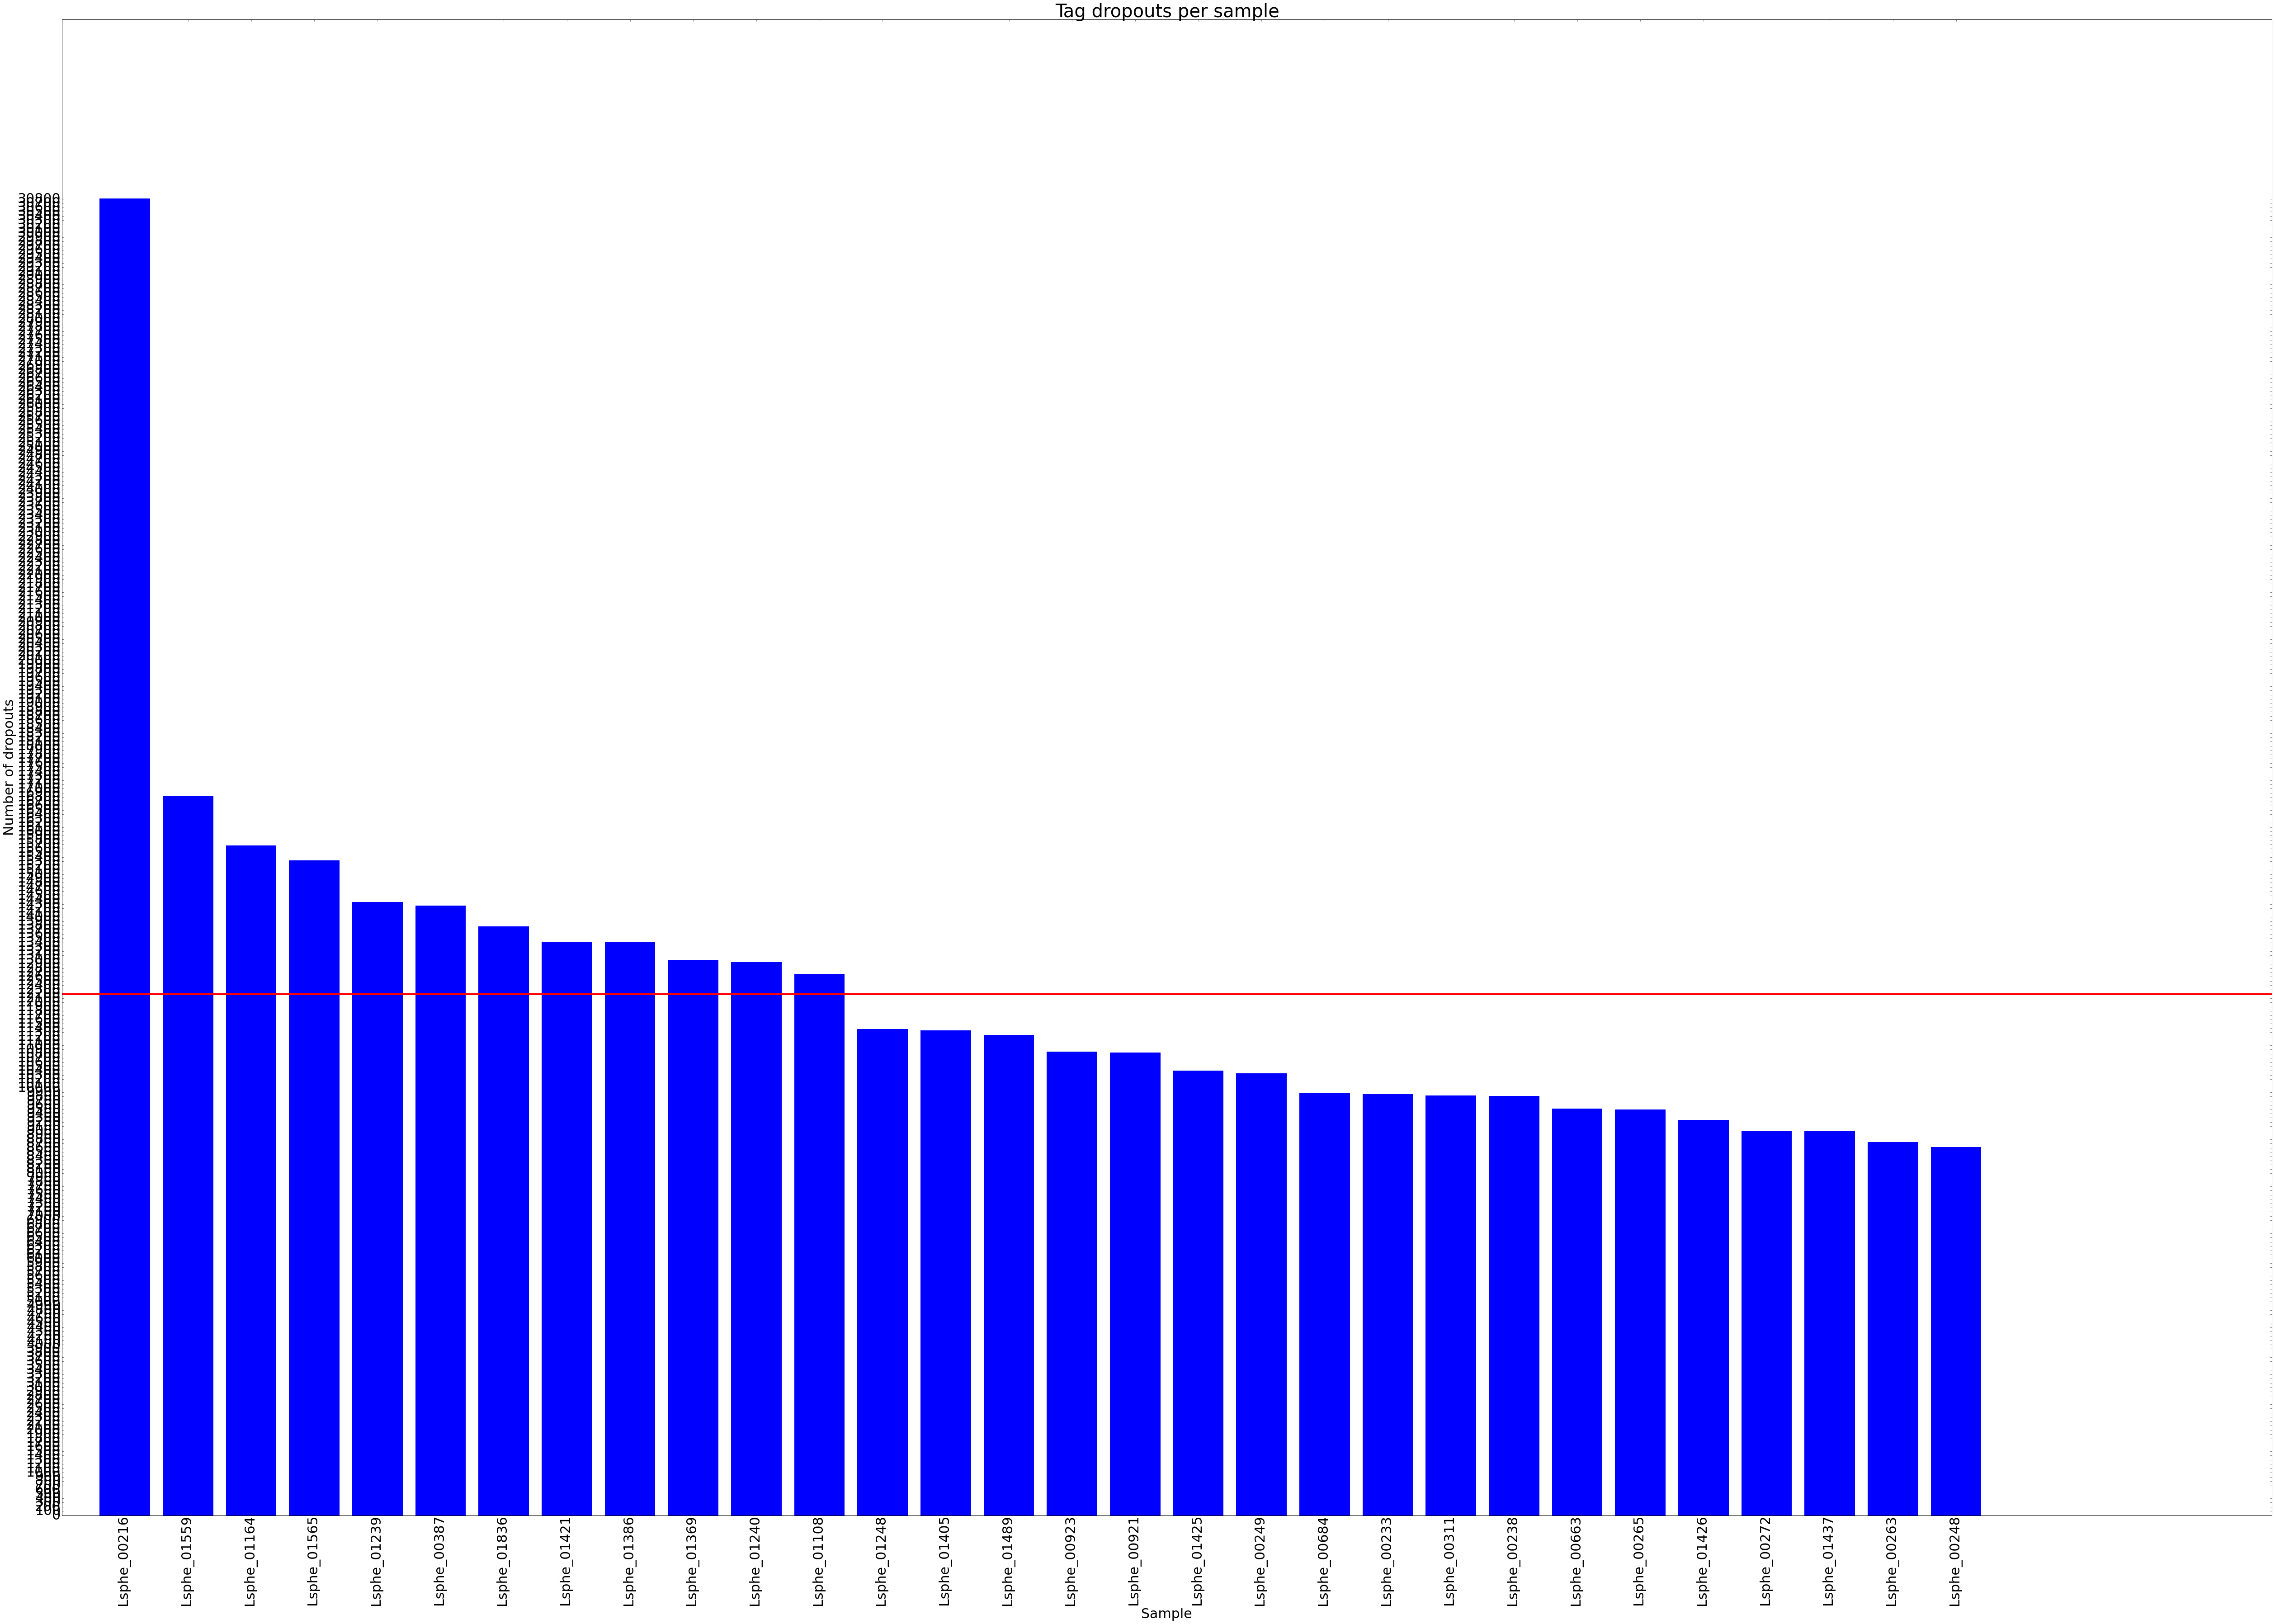

Outputs written to:
/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf//blacklist.txt


In [11]:
wd = "/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf/"
blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

####Now testing populations parameters -r and -m (p tests not useful here as always want both sexes included)

In [36]:
## params for the Incremental populations analyses

Analysis_parameters1 = {}

## Test parameters
Analysis_parameters1["parameters"] = ["r","m"]
Analysis_parameters1["p_vals"] = []
Analysis_parameters1["p_default"] = 2 ## The value of p when other params are being tested. Set as 2 for males and females!
Analysis_parameters1["r_vals"] = [0.75, 0.85, 0.9, 0.95]
Analysis_parameters1["r_default"] = 0.75 ## The value of r when other params are being tested. 
Analysis_parameters1["m_vals"] = [2,3,4,5,6]
Analysis_parameters1["m_default"] = 3 ## The value of m when other params are being tested. 
Analysis_parameters1["Populations_test_dir_path"] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/"
Analysis_parameters1["run_cline_switch"] = 1 ## run command line or not. 

## Mandatory Populations options
Analysis_parameters1["b"] = 1 ## batch ID
Analysis_parameters1["P"] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/stacks_outs/"## Path to stacks outputs
Analysis_parameters1["M"] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/Sex_ID_info.txt" ## All samples

## Outputs parameters
Analysis_parameters1["vcf"] = True
Analysis_parameters1["vcf_haplotypes"] = True

## Optional parameters
Analysis_parameters1["t"] = 7 ## number of threads
Analysis_parameters1["min_maf"] = 0.05 ## number of threads

#Analysis_parameters1["B"] = None ## Locus blacklist
Analysis_parameters1["write_single_snp"] = True ## switch to write first snp of locus or not.
Analysis_parameters1["fstats"] = False

## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/stacks_outs/ -M /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/Sex_ID_info.txt -t 7 -r 0.75 -p 2 -m 3 --min_maf 0.05 --write_single_snp --vcf --vcf_haplotypes    ## FINISHED 
Files moved to /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//r_tests/r_075
## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/stacks_outs/ -M /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/Sex_ID_info.txt -t 7 -r 0.85 -p 2 -m 3 --min_maf 0.05 --write_single_snp --vcf --vcf_haplotypes    ## FINISHED 
Files moved to /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations//r_tests/r_085
## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/stacks_outs/ -M /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/

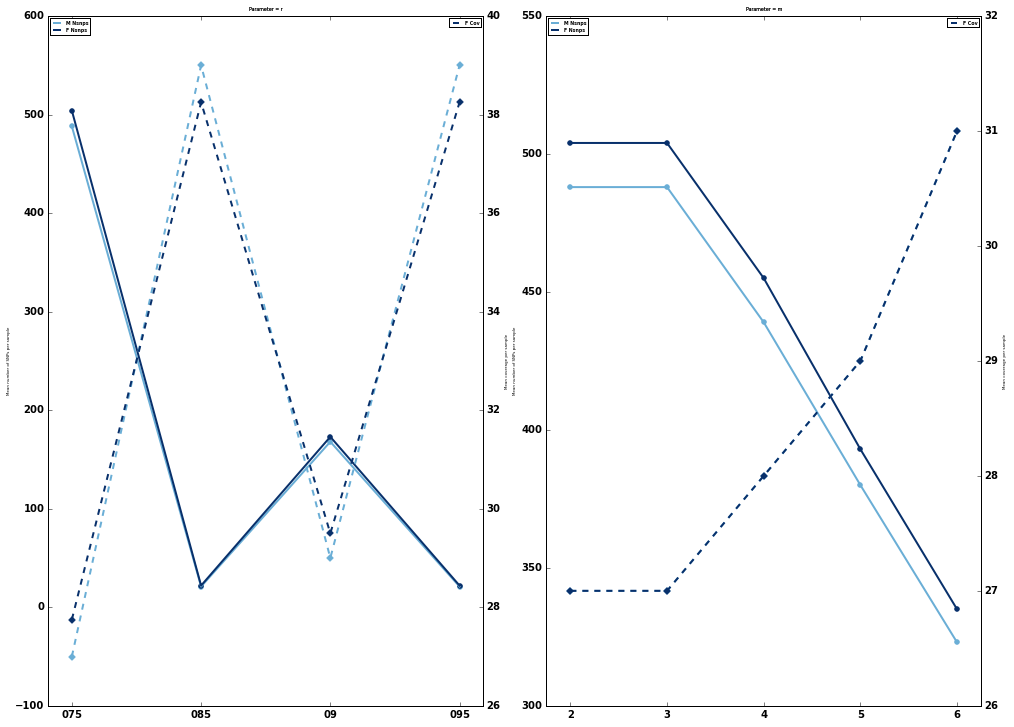

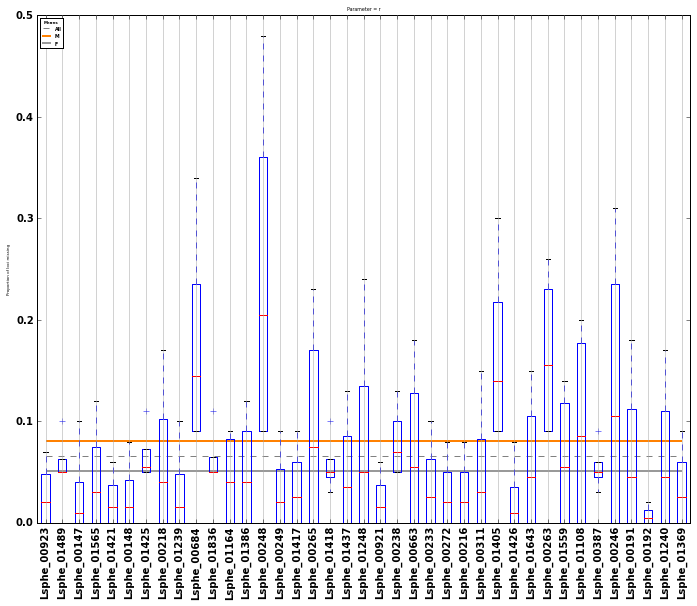

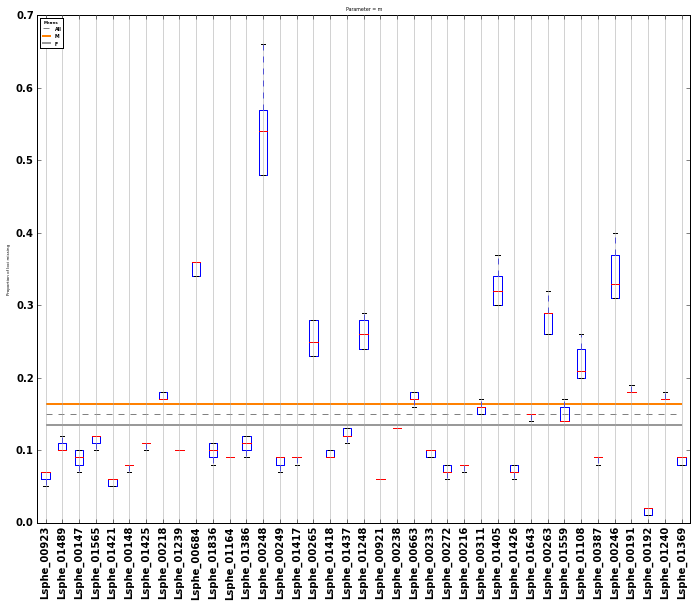

In [37]:
Sample_data, Locus_data, group_info = IncPop.Incremental_Pop(Analysis_parameters1)

There is a really low number of SNPs coming out of Populations, despite most samples having lots of loci . . . will try once more with a much reduced dataset of samples, keeping only thouse below the grey line in the bottom plot of those above

Removed:
    - Lsphe_00218
    - Lsphe_00684
    - Lsphe_00248
    - Lsphe_00265
    - Lsphe_01248
    - Lsphe_00663
    - Lsphe_00311
    - Lsphe_01405
    - Lsphe_01643
    - Lsphe_00263
    - Lsphe_01559
    - Lsphe_01108
    - Lsphe_00246
    - Lsphe_00191
    - Lsphe_01240   
    

#### Final Populations command (on cluster)
populations -b1 -c batch_1 -M sex_info_kept.txt -P ./ -p 2 -r 0.75 -t 12 --lnl_lim -10 --vcf --vcf_haplotypes --fstats > Populations.log 2>&1

#### Check the data, e.g. amount of locus/ sample dropout, coverage etc

In [30]:
final_vcf = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf"
final_popmap = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info"

MISC.av_tag_cov(final_vcf, "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Av_tag_cov.out")
MISC.sample_Avcov_from_vcf(final_vcf)

So the number of SNPs and the coverage looks much better for removing those samples. Still have quite a few to work with

# So the first thing to do is check for population structure in the data

### Step 1. Convert the vcf into a plink file, so it can be used in adegenet PCA.

In [66]:
%%bash

## All data 
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.vcf > /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.fam
written.
1183 variants loaded from .bim file.
30 people (0 males, 0 females, 30 ambigu

### Step 2. In R, load packages, read in plink file and run the PCA

In [68]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Get sex assignments for samples
sexes <- read.delim("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt", header = F)


## Run PCA
pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



### Step 3. Plot the PCA

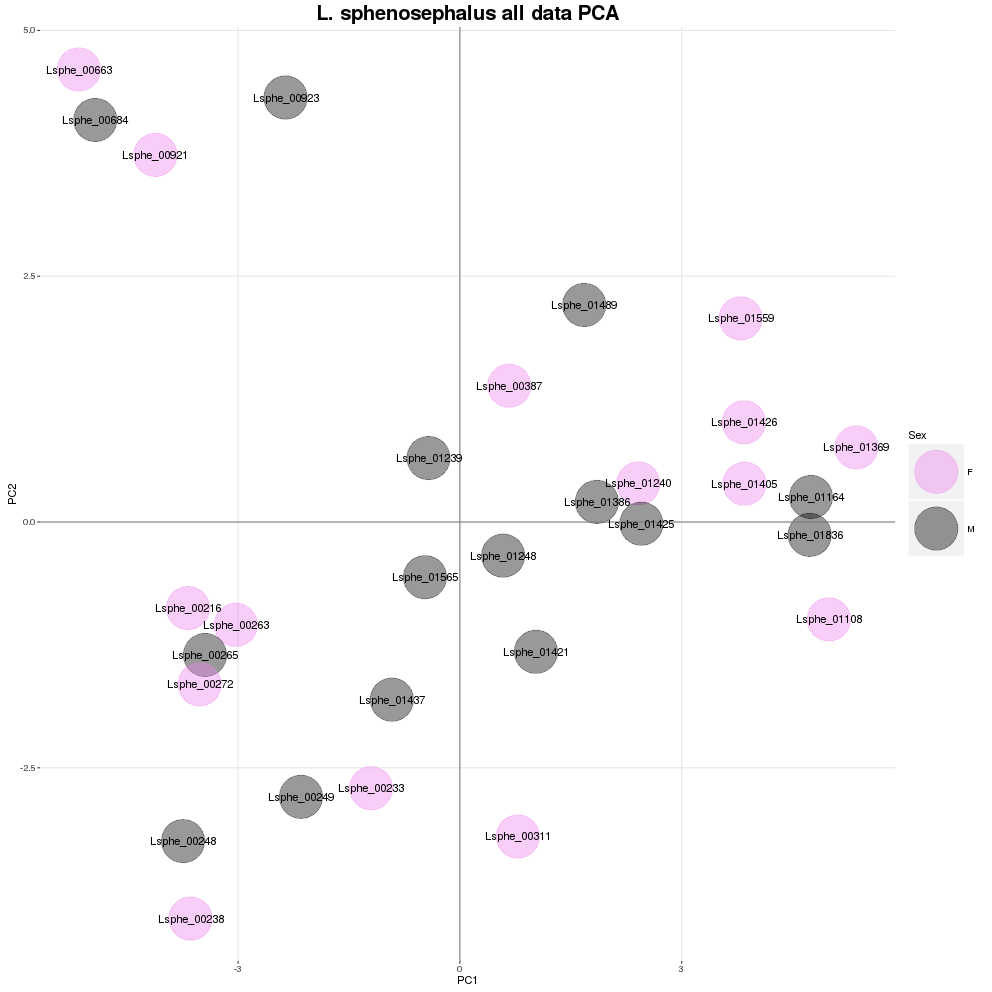

In [77]:
%%R -w 35 -h 35 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. sphenosephalus all data PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 4) ## Size of points and text in plots) ## Colours to use

Ok, so there is basically no structure in the dataset. There are 4 samples in the top left that are slight outliers but this does not relate to geography etc. So I will proceed with the analyses with the full dataset together. 

### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

In [26]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/Sex_ID_info_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.6 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 1183
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 214
Number of loci with enough data = 968
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


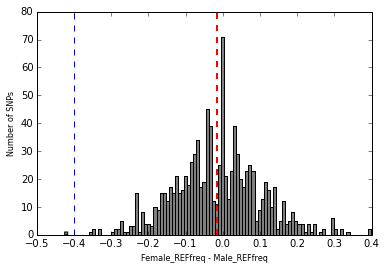


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 1183
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 214
Number of loci with enough data = 968
Number of putative X linked snps = 2
Number of putative X linked tags = 2
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 15
Number of males: 15
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers

 ## After merging tags accross methods ## 

Final number of XY tags = 2
Final number of ZW tags = 1


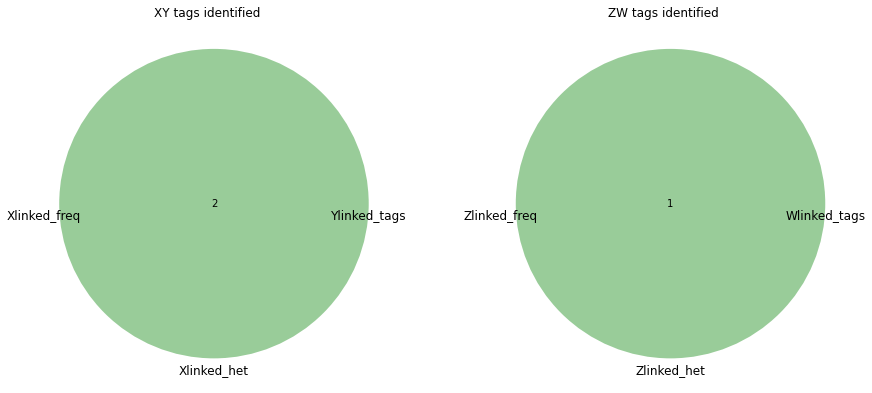

In [27]:
## Coverage cut off of 3 for methods 1 and 2.

XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

So firstly, there are very few sex linked markers.

Secondly what is the cause of all of these false positives?? Could they be X specific loci or null alleles in males? 

Now mapping the coverage in all of these loci against the coverages of the rest of the loci in males to see what this looks like, if the ZW tags are false positives and they are actually hemizygoes X specific tags, then they should have half the coverage in males compared to females.

### Getting male coverages for ZW tags, XY tags and for the autosomal tags

Using the Super_av_tag_cov function in Misc Rad tools!

### All data 

Number of tags =  146254
Average tag coverage 21.2965295536 (+- 11.1804191123 )


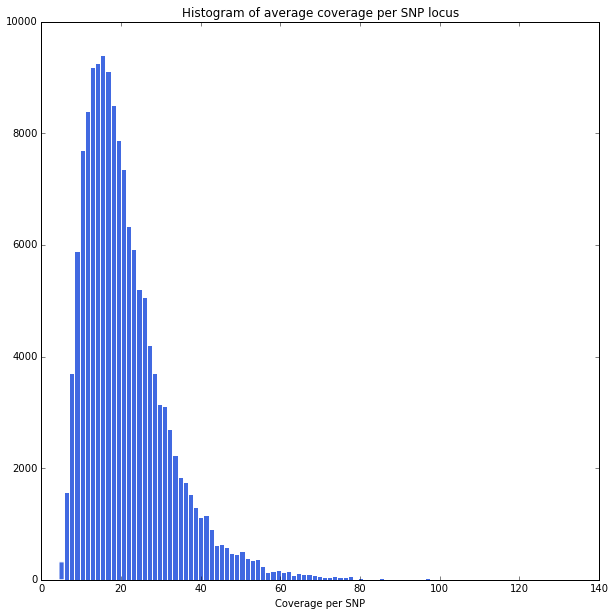

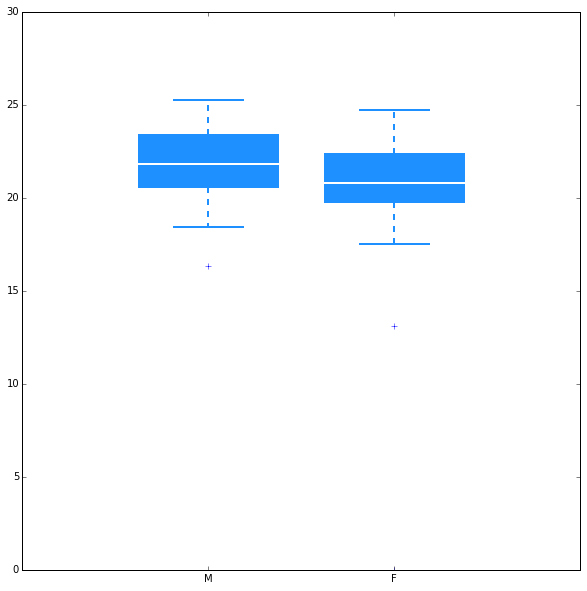

In [2]:
raw_means, pop_dict = MISC.Super_av_tag_cov("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf", \
                       popmap = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt")

### Now get the whitelist from the ZW tags identified


In [145]:
ZW_tags = open("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Putative_ZWlinked_makers.fa", 'r').readlines()
XY_tags = open("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Putative_XYlinked_makers.fa", 'r').readlines()
#vcf = open("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf", 'r')

ZW_whitelist = []

for line in ZW_tags:
    if line.startswith(">"):
        fa_tag_id = line.split("_")[2]
        ZW_whitelist.append(fa_tag_id)

XY_whitelist = []

for line in XY_tags:
    if line.startswith(">"):
        fa_tag_id = line.split("_")[2]
        XY_whitelist.append(fa_tag_id)

print len(ZW_whitelist)
print len(XY_whitelist)

49
68


#### Now comparing XY loci and just ZW loci, expect to see males have lower coverage than females in the ZW tags if they are indeed hemizygous

### XY

Number of tags =  301
Average tag coverage 24.1328903654 (+- 13.8874309389 )


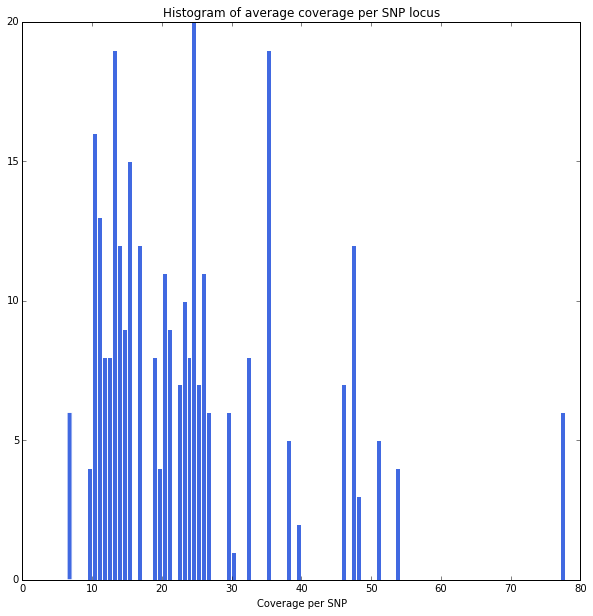

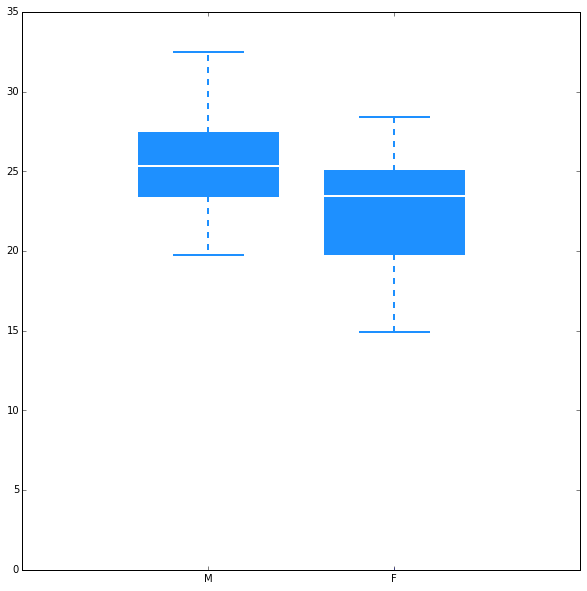

In [155]:
raw_means, pop_dict = Super_av_tag_cov("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf", \
                                  popmap = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt",\
                                  whitelist = XY_whitelist)

### ZW

Number of tags =  201
Average tag coverage 20.32039801 (+- 10.3274127722 )


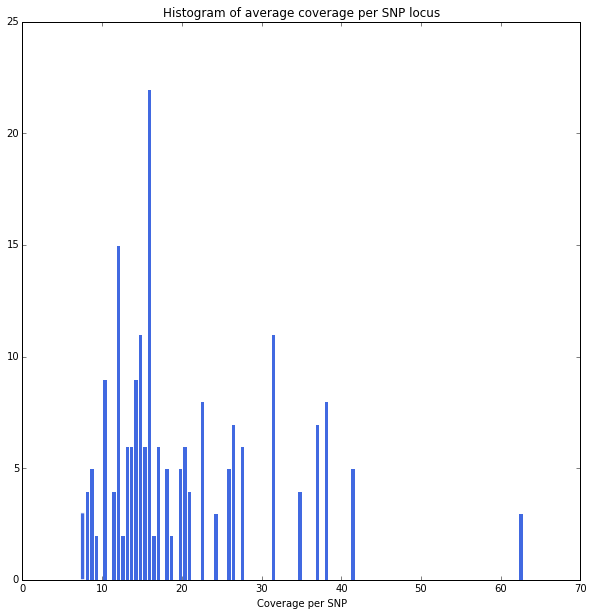

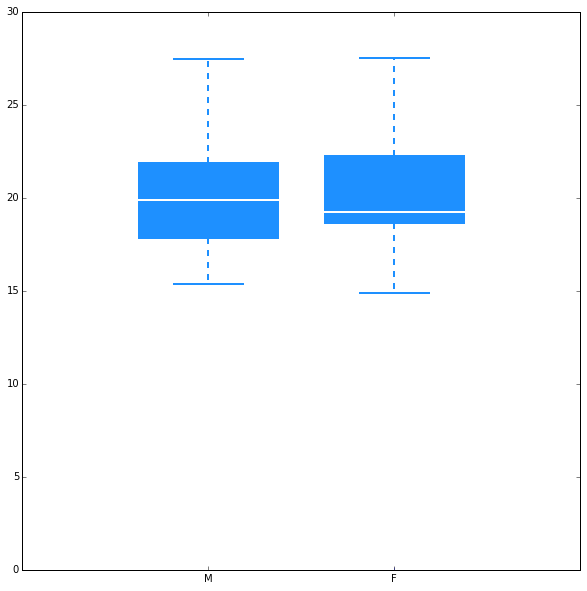

In [157]:
raw_means, pop_dict = Super_av_tag_cov("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf", \
                                  popmap = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt",\
                                  whitelist = ZW_whitelist)

So, the differences I expect to see are not that clear. It seems that in fact, XY tags have higher coverage in males than in females, and ZW tags show little or no difference. However, looking at the whole dataset, there is a general upwards coverage bias between males and females, probably reflecting a few more bad female samples than male. So the XY pattern is no different to the overall pattern in the data. In light of that, the ZW pattern is the only one which shows a reduction in male coverage relative to the whole dataset, suggesting that there is in fact some hemizygosity here. However, either the hemizygous loci do not make up all of these loci, or there is too much noise in the data to overcome the general bias of coverage towards males in this sample set. 




### Maybe its mis-assignment of males and females...?

One reason that there may be very few sex linked markers in the data might be that males and females have been mis-assigned. So if I plot the samples on a PCA using the few sex linked markers that have been identified, perhaps this will highlight the few samples that were wrongly assigned. 

Checking now . . . 

In [39]:
import vcf
from Bio import SeqIO


vcfpath = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf.altered"

XY_set = set(XYset)

SL_vcf = open("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps.vcf", 'w')

XYtags_parsed = SeqIO.parse(XY_tags, "fasta")
vcf_parsed = vcf.Reader(open(vcfpath, 'r'))

XY_ids = []
    
for line in open(vcfpath,'r').readlines():
    if line.startswith("#"):
        SL_vcf.write(line)
    else:
        if line.split()[2] in XY_set:
            SL_vcf.write(line)
SL_vcf.close()

In [40]:
%%bash

## XY linked data only
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps.vcf > /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.fam
written.
1183 variants loaded from .bim file.
30 people (0 males, 0 females, 30 ambigu

In [42]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/") 

## Sex linked SNPs only (about 150)
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca2 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



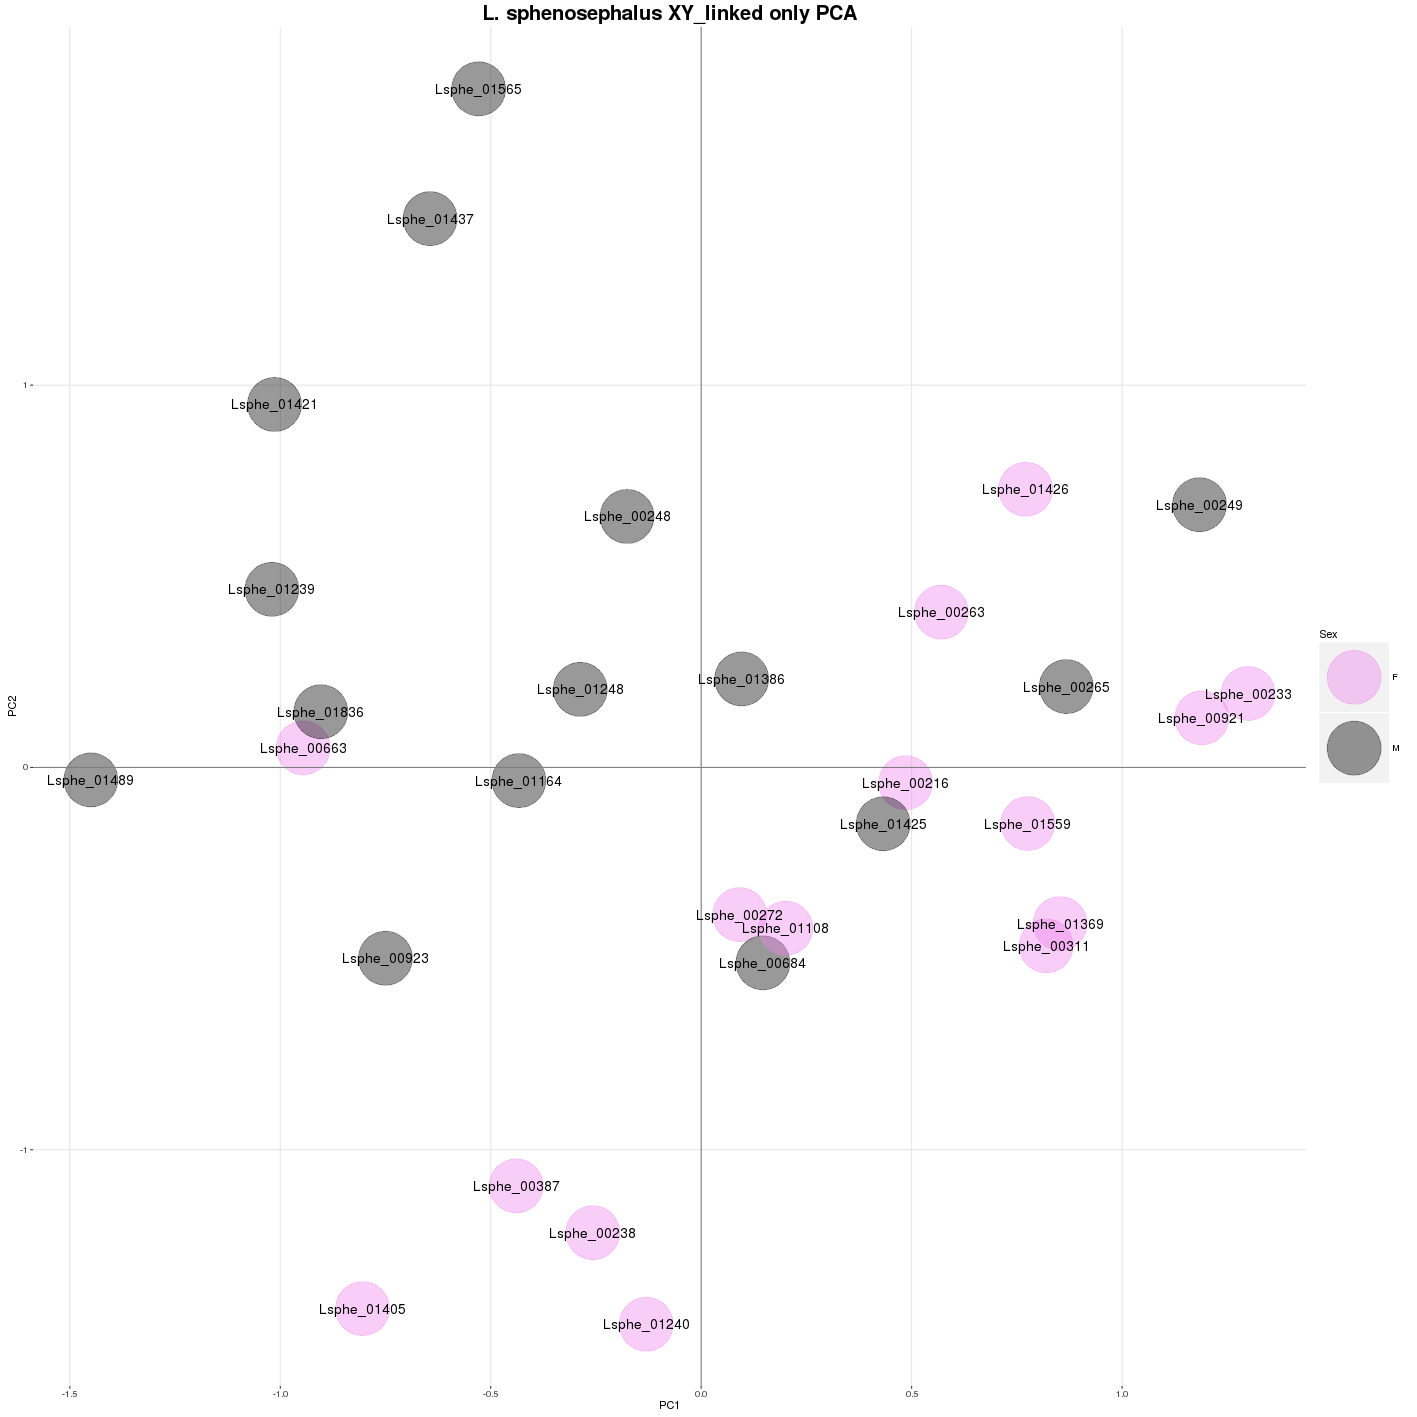

In [78]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. sphenosephalus XY_linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

Looks like Lsphe_00265 and Lsphe_01425 could be mis-assigned. 

Will try removing 

In [21]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/Sex_ID_info_kept.txt" ## 
###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.6 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 1183
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 214
Number of loci with enough data = 968
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


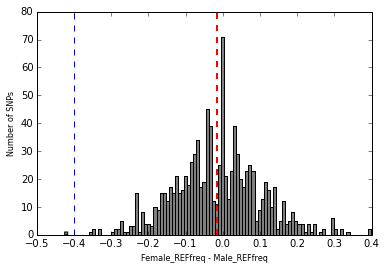


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 1183
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 214
Number of loci with enough data = 968
Number of putative X linked snps = 2
Number of putative X linked tags = 2
Number of putative Z linked markers = 1
Number of putative Z linked tags = 1

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 15
Number of males: 15
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers

 ## After merging tags accross methods ## 

Final number of XY tags = 2
Final number of ZW tags = 1


/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:52: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib_venn/_venn3.py:60: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


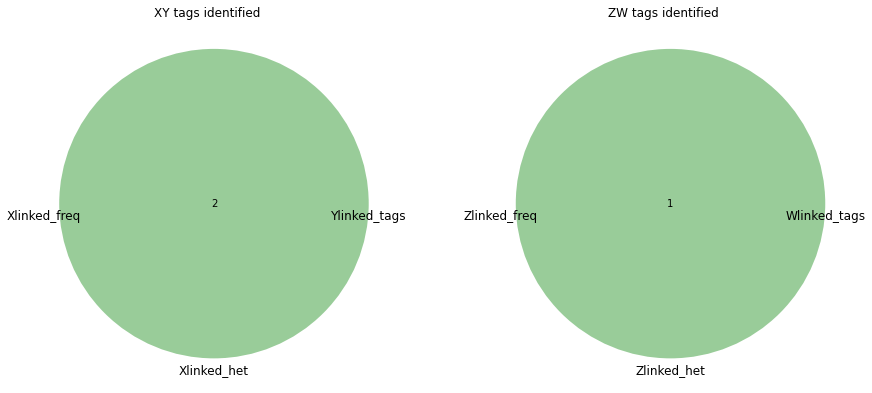

In [22]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### Repeat the PCA process . . . 

In [47]:
import vcf
from Bio import SeqIO


vcfpath = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf.altered"

XY_set = set(XYset)

SL_vcf = open("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps.vcf", 'w')

XYtags_parsed = SeqIO.parse(XY_tags, "fasta")
vcf_parsed = vcf.Reader(open(vcfpath, 'r'))

XY_ids = []
    
for line in open(vcfpath,'r').readlines():
    if line.startswith("#"):
        SL_vcf.write(line)
    else:
        if line.split()[2] in XY_set:
            SL_vcf.write(line)
SL_vcf.close()

In [48]:
%%bash

## All data 
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.vcf > /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink


## XY linked data only
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps.vcf > /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.fam
written.
1183 variants loaded from .bim file.
30 people (0 males, 0 females, 30 ambigu

In [49]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex linked SNPs only (about 150)
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 
## again if on linux, you can set "parallel" to TRUE to use multi cores
## Also, here I have specified nf = 3 to retain 3 PCs. If I don't do this it will plot the eigenvalues and interactively ask you
## how many PCs to retain. This even works in Jupyter! Cos Jupyter and rpy2 are bloody cool! Thats Why!

pca2 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



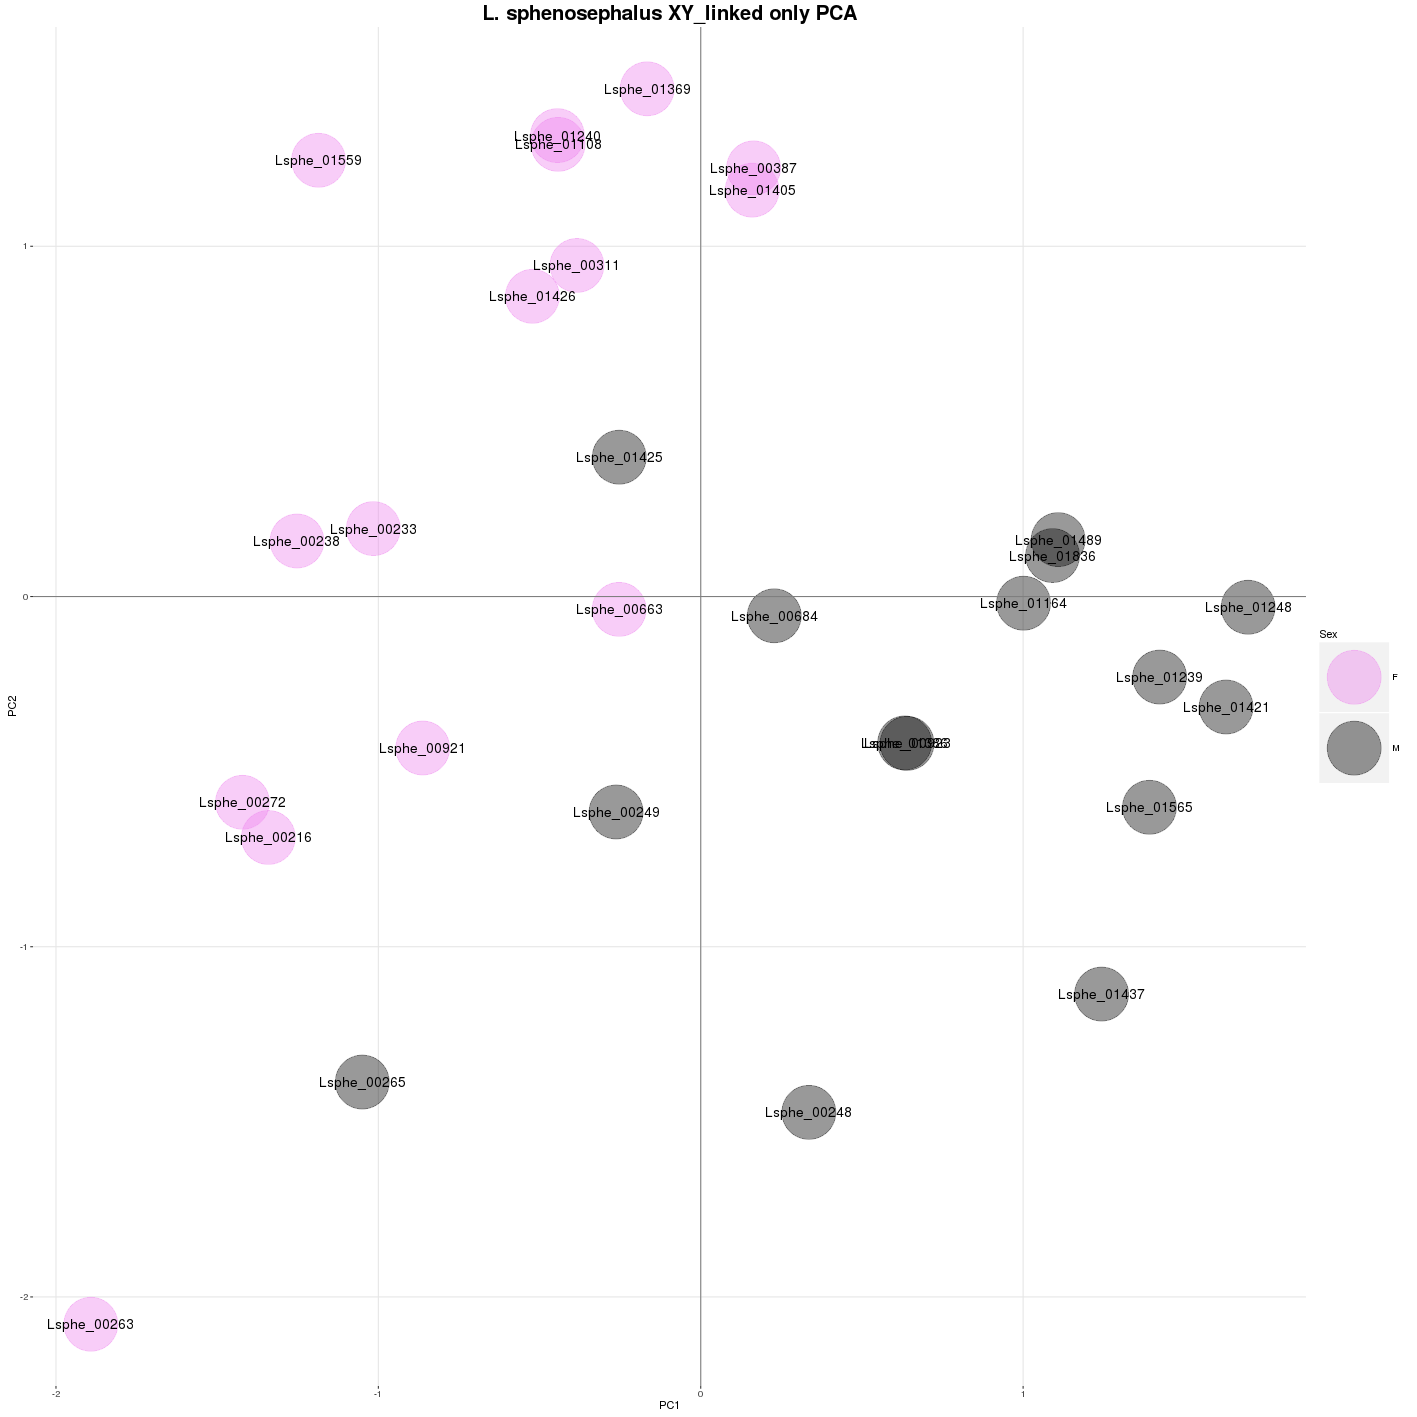

In [51]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. sphenosephalus XY_linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

### Still not great. How about taking out everything thats in the middle and running one more time. . . 


##### Using SNP frequency approach #### 

Number of loci = 146254
Number of samples = 30
Number of loci with too few samples = 28023
Number of loci with low MAF = 84099
Number of loci with enough data = 34131
Number of putative X linked snps = 5
Number of putative X linked tags = 5
Number of putative Z linked markers = 8
Number of putative Z linked tags = 7


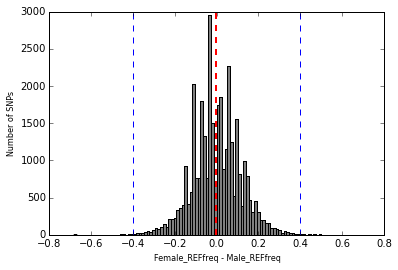


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 146254
Number of samples = 30
Number of loci with too few samples = 28023
Number of loci with low MAF = 84099
Number of loci with enough data = 34131
Number of putative X linked snps = 17
Number of putative X linked tags = 15
Number of putative Z linked markers = 12
Number of putative Z linked tags = 11

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 14
Number of males: 11
Number of Putative Y linked tags: 3
Number of Putative W linked tags: 0

 ### DONE! ###


 ## After merging tags accross methods ## 

Final number of XY tags = 23
Final number of ZW tags = 18
Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering


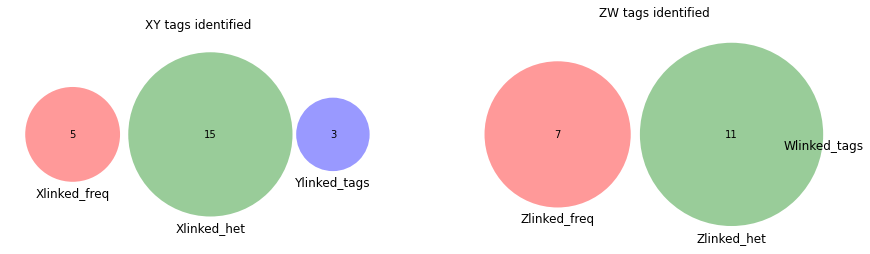

In [52]:
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info_filtered2.txt" ## 
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [53]:
import vcf
from Bio import SeqIO


vcfpath = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/batch_1.vcf.altered"

XY_set = set(XYset)

SL_vcf = open("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps.vcf", 'w')

XYtags_parsed = SeqIO.parse(XY_tags, "fasta")
vcf_parsed = vcf.Reader(open(vcfpath, 'r'))

XY_ids = []
    
for line in open(vcfpath,'r').readlines():
    if line.startswith("#"):
        SL_vcf.write(line)
    else:
        if line.split()[2] in XY_set:
            SL_vcf.write(line)
SL_vcf.close()

In [54]:
%%bash

## All data 
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.vcf > /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink


## XY linked data only
sed 's/_/-/g' /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps.vcf > /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered.vcf --recode A --allow-extra-chr -out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/XY_linked_snps_altered_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet.vcf

32084 MB RAM detected; reserving 16042 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1_altered_adegenet_plink-temporary.fam
written.
1183 variants loaded from .bim file.
30 people (0 males, 0 females, 30 ambigu

In [55]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('batch_1_altered_adegenet_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) ## If you are on linus you can change n.cores. But >1 core is not supported on windows.

## Sex linked SNPs only (about 150)
XY_linked_data <- read.PLINK('XY_linked_snps_altered_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("/home/djeffrie/Data/RADseq/Lsphenosephalus/Incremental/Populations/after_sample_filtering/Sex_ID_info.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 2, nf = 5) 
## again if on linux, you can set "parallel" to TRUE to use multi cores
## Also, here I have specified nf = 3 to retain 3 PCs. If I don't do this it will plot the eigenvalues and interactively ask you
## how many PCs to retain. This even works in Jupyter! Cos Jupyter and rpy2 are bloody cool! Thats Why!

pca2 <- glPca(XY_linked_data, parallel = TRUE, n.cores = 2, nf = 5) 


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.


 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



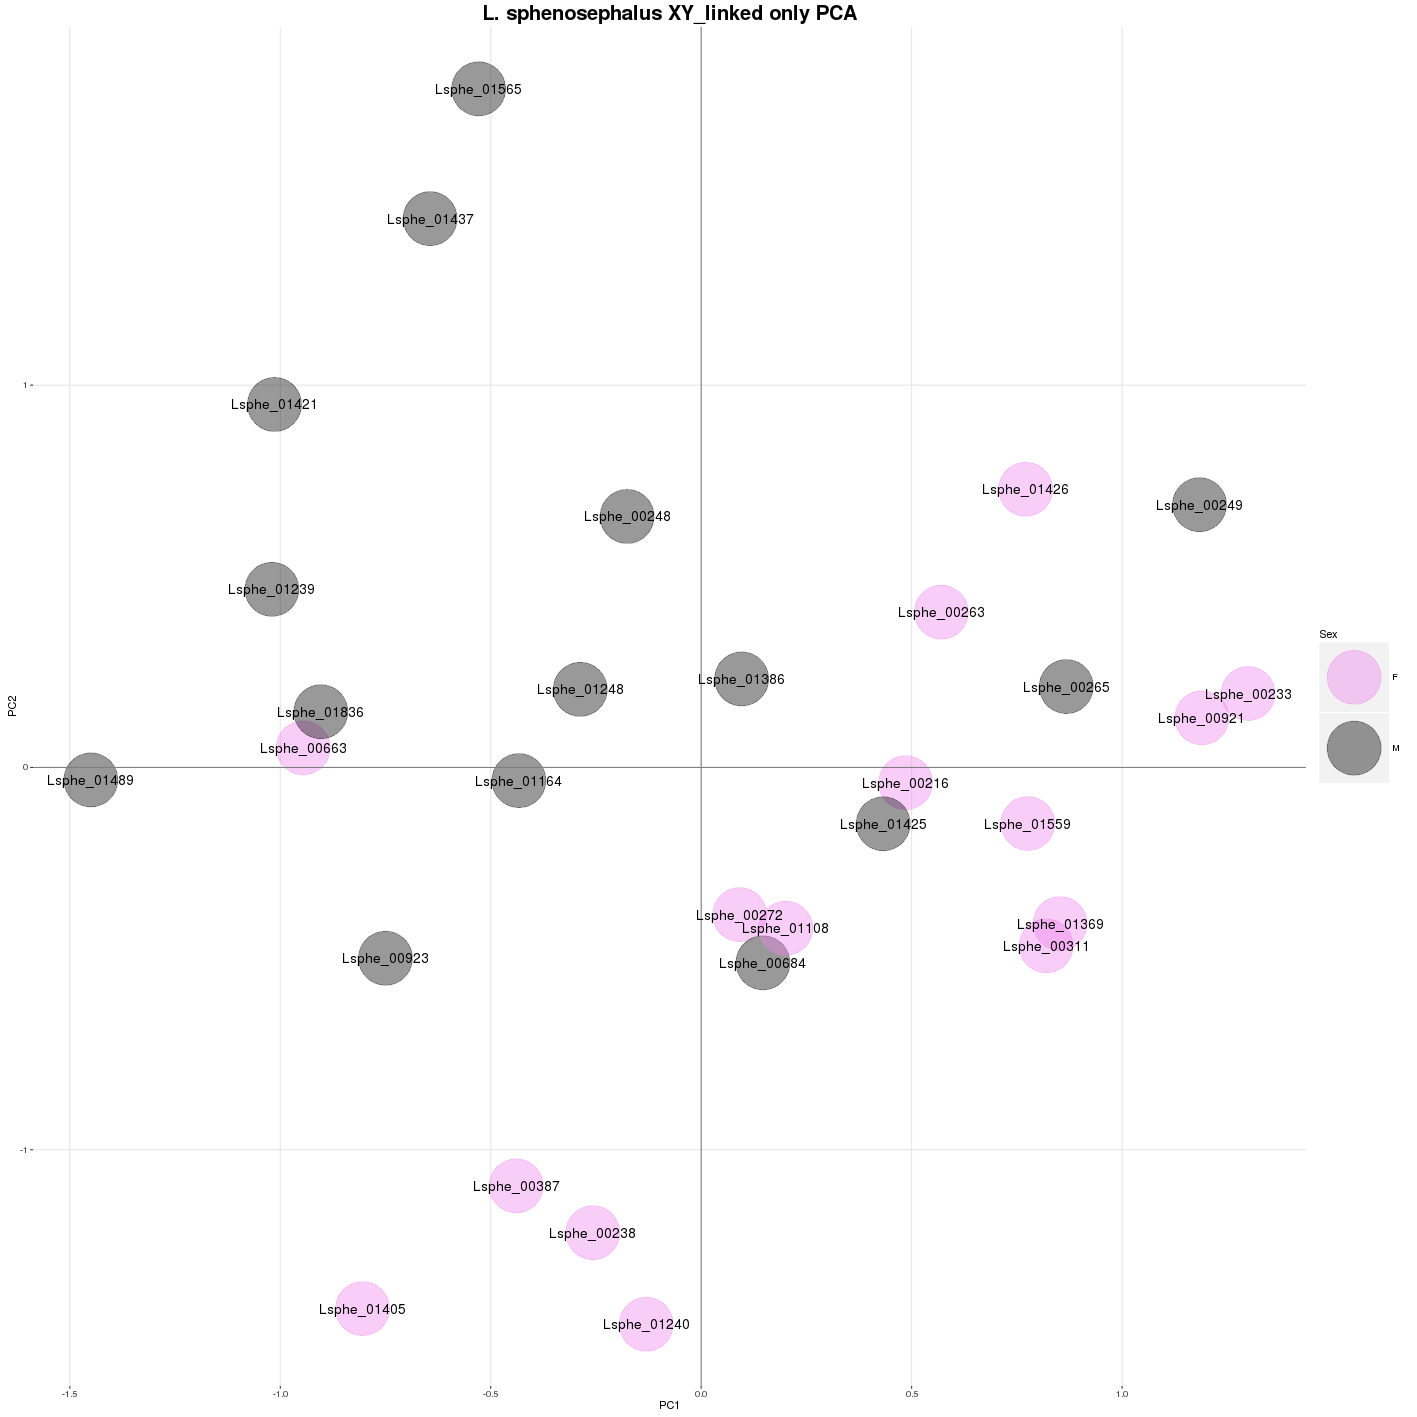

In [56]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca2,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "L. sphenosephalus XY_linked only PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = c("violet", "black"),
           func_cex = 5) ## Size of points and text in plots) ## Colours to use

<b>So this still hasn't helped much . . . </b>

# Summary

Although some markers have been putatively identified as sex linked with XY, there are not many, and the number of ZW loci is relatively high. Further, in the PCAs, these XY markers are not very diagnostic, thus I am not very confident about the validity of these XY markers. 

Given that this should be a strong dataset (i.e. good coverage, many loci and many samples) I think that although I cannot identify the sex linked markers confidently, I can say that either the XY divergence is very low in these samples, or that there is a lot of Y haplotype polymorphism perhaps. Either way, I don't think I can go any further with this dataset for now. 

### Big VCF! PRODUCED BY SEQUENCING ANOTHER LANE!

Number of tags =  1183
Average tag coverage 24.9963369963 (+- 13.3909359318 )


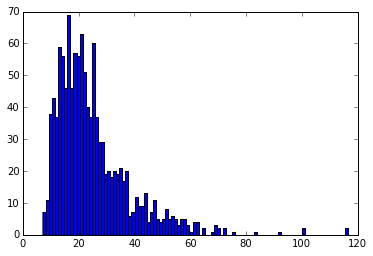

In [3]:
%matplotlib inline
import MISC_RAD_tools as MISC
wd = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/"
final_vcf = "%s/batch_1.vcf" % wd
MISC.av_tag_cov(final_vcf, "%s/Av_tag_cov.out" % wd)
#MISC.sample_Avcov_from_vcf(final_vcf)

In [28]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Lsphenosephalus/big_vcf/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers/Sex_ID_info_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 10 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.6 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 146254
Number of samples = 30
Number of loci with too few samples = 0
Number of loci with low MAF = 84099
Number of loci with enough data = 62154
Number of putative X linked snps = 8
Number of putative X linked tags = 8
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5


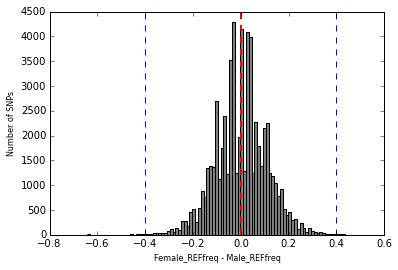


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 146254
Number of samples = 30
Number of loci with too few samples = 22831
Number of loci with low MAF = 84099
Number of loci with enough data = 39269
Number of putative X linked snps = 65
Number of putative X linked tags = 65
Number of putative Z linked markers = 41
Number of putative Z linked tags = 41

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 15
Number of males: 15
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Lsphenosephalus/Sex_linked_markers

 ## After merging tags accross methods ## 

Final number of XY tags = 73
Final number of ZW tags = 46


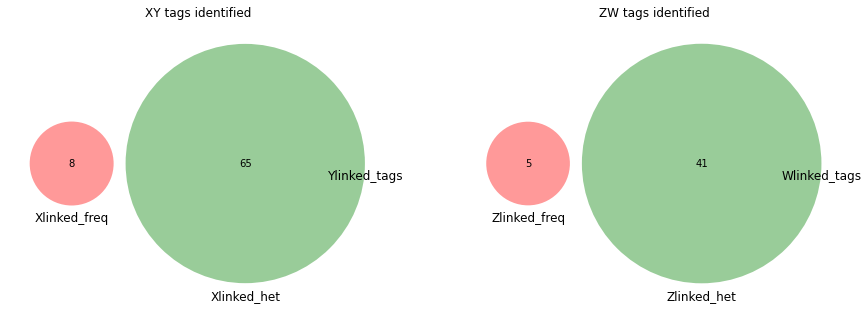

In [29]:
## Coverage cut off of 3 for methods 1 and 2.

XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")